In [1]:
import konlpy

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import re
import tensorflow as tf
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 데이터 확인

In [3]:
import csv
f = open('result_file.csv','r', encoding = 'UTF-8-sig')
rdr = csv.reader(f)
for line in rdr:
    print(line)
f.close()

['0', '요즘 연앤들 싫은소린 아에 차단하고 듣기좋은소리만 들으려하는듯. 조금만 비판해도 악플러 법적대응이라니 돈써서 본인들이 위라는행동 참 ㅋ 오래가겠다', '1']
['1', '저 짧은 몇 마디에서 인성이 보이넴 ..', '1']
['2', '개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ', '1']
['3', '정신분열 잼 ㅋㅋㅋ', '1']
['4', '실력에비해 오래갔다', '1']
['5', '거만이 하늘을 찌르네. 뭔짓을 하든 묻지도 따지지도 말고 찬양만 하고 돈이나 바쳐라 이건가?', '1']
['6', '점점... 왜저러냐 리더라는게 맨날 표정관리 못하고 기분에 따라 행동하고말하는거 진짜 별로다', '1']
['7', '말하는거 저급해...', '1']
['8', '말투가 왜저래ㅋㅋ', '1']
['9', '아무리 그래도 그렇지 말투가 저게 뭐냐;', '1']
['10', '왜저래 비꼰데?? 힘들면 그냥 조용히 탈퇴하세요~ 요즘 보면 얼굴도 어둡고 기분대로 행동하고 표정 다 드러내더만 이제 내리막길 ..다들 얼굴에 생기가 없고 초심도 잃은거 같고 ..배부르지?? 그만하고 쉬어라 다들 ..팬 많지? 금방 썰물처럼 다 휩쓸려간다 ~너희 아무것도 아니다~ 배부른 소리하고 자빠졌네 ~비호감이네 진짜', '1']
['11', '아무리봐도 잘못 뽑은 것 같다', '1']
['12', '인기있을때 높은곳에 있을 때 말을 좀 조심할 필요가 있을 거 같네요 표현이 참;;;', '1']
['13', '인기도 좋고 다 좋은데 말투가 왜 그래요 어린 팬들도 많은 사람이', '1']
['14', '진짜 예민하네;', '1']
['15', '와...좀 깨긴 깬다 스트레스여서 그럴 수도 있는데 그래도 라이브 동영상에서 저런 말을 했다는게....당신이 그 자리에 앉아있는 것도 그런 관심 때문인 것을....ㅉㅉ', '1']
['16', '윽..진짜 말투 이런다고???', '1']
['17', '말 더럽게 싸가지 없게 하네ㅋㅋㅋㅋㅋ 니 성격대로 

['2339', '관종에 먹이를 주지말자.', '1']
['2340', '제정신 아님!근데 뭐 이런 듣보잡을 일일이 다 기사에 올리는 기레기는 뭐냐?', '1']
['2341', '우엑~~~', '1']
['2342', '별  거지같는걸 기사로 올려~좋은아침 기분잡치게~', '1']
['2343', '미...친것. 구역질나.', '1']
['2344', '기사내려주세요 기분나빠요', '1']
['2345', '씨발 내가 뭘 본거야 더러워', '1']
['2346', '별 xx 이런 드러븐 기사 올리지좀 마라', '1']
['2347', '관종의  최후냐? ㅉㅉㅉ 꼴갑이네', '1']
['2348', '아주 쌍으로 ㅈㄹ들 하시네 ㅉㅉ', '1']
['2349', '이런걸 봐야하나? 알고싶지않다  이런잡종들 ㅉㅉㅉ', '1']
['2350', '이관종은언제쯤안나오나', '1']
['2351', '가서 몸이나 팔아 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 남자들이 좋아해줄 듯 니 몸', '1']
['2352', '제정신들이 아니구만 ㄷ ㄷ ㄷ ㄷ', '1']
['2353', '정신이 온화하지못하구나전쟁나서다불타라삼청교육대 부활지지한다.', '1']
['2354', '정신병......하 진짜 안보고 싶다.', '1']
['2355', '개 관종들', '1']
['2356', '정신병자 같어', '1']
['2357', '역겹다..', '1']
['2358', '정신병자다..', '1']
['2359', '정신병인데 왜 태어났냐? ㅉㅉ', '1']
['2360', '장애 아니냐?', '1']
['2361', '부모도 딸도 정상은 아닌듯', '1']
['2362', '역시 가정교육이 중요함 ㅋㅋㅋㅋ 부모의 역할이 얼마나 중요한데 ㅋㅋㅋ 딱 보니 ㅋㅋㅋ 답 없다 ㅋㅋ', '1']
['2363', '보쯰에 염산 부어야함', '1']
['2364', '여자끼리 물고 빠는건가?맛있냐?', '1']
['2365', '사망기사 뜨면 올려주세요', '1']
['2366', '자살해', '1']
['2

['3693', '재기해', '1']
['3694', '대체 어디가 이쁜지...기자님 취향이신지....  정상아니게 보이는데 자꾸 기사 왜나오는지...ㅉㅉ', '1']
['3695', '사악한웃음...', '1']
['3696', 'ㅋㅋㅋㅋ 귀신같다', '1']
['3697', '자 이제 예쁜여자를 보여주세요...', '1']
['3698', '나오지 말어. 진짜 소름끼친다', '1']
['3699', '토나오게 생겼어', '1']
['3700', '니네 엄마는 너같은 걸 낳고 좋다고 미역국 먹었겠군', '1']
['3701', '무서워...얼굴 무섭게 생겼어', '1']
['3702', '내가 저런 애랑 결혼하라고 하면 진', '1']
['3703', '아 진짜 죽여버리고 싶어', '1']
['3704', '으 소름돋아', '1']
['3705', '천천히 고통을 느끼게 하면서 죽이고 싶다', '1']
['3706', '난 진자 딱 한 명 죽일 수 있다면 널 죽이고 말거야', '1']
['3707', '죽이고 싶은 욕망이 올라온다', '1']
['3708', '개악마같은 새끼', '1']
['3709', '사탄도 안데려갈거같은데 너는 ㅋㅋ', '1']
['3710', '미친 재수없어', '1']
['3711', '비호감년', '1']
['3712', '존나 악마새끼', '1']
['3713', '얼굴이 터진다요.뭐를 먹었나! 맞았나!ㅎㅎㅎ', '1']
['3714', '나같으면 쥐 죽은듯이 조용히있겠다 진짜 최고의 관종 부끄러움도 모르는 인간', '1']
['3715', '눈빛부터 갔네 갔어', '1']
['3716', '별존재감없는데 하는짓이 극혐이라 연예인 중에 젤 싫음', '1']
['3717', '얼굴 진짜 보기싫어', '1']
['3718', '그냥 내 눈앞에 안보이면 좋겠는데 은퇴는 어떠한가', '1']
['3719', '깔깔 진짜 못생겼어', '1']
['3720', '아 진짜 사람 인성이 얼굴에 드러난다 역시 악마같아', '1']
['3721'

['5473', '팬티를 내놨으니까 그러는 거지. 화사팬들 많네', '1']
['5474', 'ㅈㄹ도 풍년이네', '1']
['5475', '얘는다이상해', '1']
['5476', '요상하게 입으면 걸크러쉬냐?? 일부여자들 참 자기 성별에 열등감이 많은거같다 남자 따라해서 꾸미고 이상하게 꾸미면 걸크래쉬래 ㅋ', '1']
['5477', '별루에요', '1']
['5478', '화사바지를 기자들이 마음에 안들어하나봄~!나도 저 스타일 극혐', '1']
['5479', '이놈의 오크ㅡ년들이 오징어 문어대가리들끼리 저들 서로이쁘다 ㅈㄹ을하네 개 드루워가지고 밖에서 나돌아다니지말아라 처맞을면상이면.. 찐따모임 그런건가 못생긴여자가 많은게 현실이라도 분수는 알아야지~ 안보인다고 줘패버릭라..', '1']
['5480', '옷꼬라지가 심하긴했네 했네 했어', '1']
['5481', '안본눈삽니다. 하도 띄어주니까 지가 셀럽인줄 아나봄ㅜㅜ', '1']
['5482', '너도 관종이였니', '1']
['5483', '넘 구림...', '1']
['5484', '애초에 관심도 없었지만 관종 같아서 더 꼴보기 싫어짐', '1']
['5485', '조현한테는 쌉지럴하고 화사는 쉴드 오지게치네 꼴페미들 그래 니들 다 화사 닮음', '1']
['5486', '진짜 역겹다', '1']
['5487', '암튼보기싫어 ㅋㅋ', '1']
['5488', '웩!! 토나온다~~~~~~~~', '1']
['5489', '걍 벗고댕겨라', '1']
['5490', '그지같다...', '1']
['5491', '굳..이  이렇게까지.,. 취재나올걸알면서  ...이슈로는 성공했네', '1']
['5492', '노출증', '1']
['5493', '응 그냥촌시러ㅋㅋㅋ', '1']
['5494', '심난허다ㅎㅎ', '1']
['5495', '개취가 넘 더럽네ㅉㅉㅉ', '1']
['5496', '일반인이 저러고 다녀봐..미친 여자 소리 듣지..', '1']
['5497', '관종', '1']
['54

['7473', '진짜 존경스럽다 어리지만 대단한 뚝심과 유연함을 지닌 인간 박지민 멋지다', '0']
['7474', '진짜 지민이 데뷔스토리는 가슴찡하고 눈물남', '0']
['7475', '진짜 지민이 무대를 보고 팬이 안될수가 없어. 너무 잘하고 먼가 눈을 뗄수 없이 매력적이고 감동이야. 거기다 지민이 인성과 노력과 열정은... 너무 멋지고 사랑스러운 최고의 슈퍼스타고 개인으로서도 진짜 러블리해', '0']
['7476', '진짜 천재가 노력까지 꾸준히 성실히  죽도록 하니 이런 사람 본적 없음 지민 최고다', '0']
['7477', '진짜 춤을 추기 위해 태어난 천재같아ㅠㅠㅠㅠ 진짜 진짜 춤을 너무 아름답게 추심 ㅠㅠㅠㅠㅠ', '0']
['7478', '진짜~~지민이 최고야👍👍👍', '0']
['7479', '진쩌 너무너무 뛰어난 지민이..아티스트로 남았어도 대성했을듯~', '0']
['7480', '짱이다', '0']
['7481', '차원이 다른 퍼포먼스 보여주는 지민이 있기까지 엄청난 노력과 열정이 있었네요 지민 응원해', '0']
['7482', '착하고 선한 지민이는 천사가 보낸 아름다운 사람', '0']
['7483', '착하고 착한 사람, 지민이에게 좋은일만 가득가득이였으면 좋겠어요~', '0']
['7484', '찬란한 너의 청춘을 응원해~ 영원히 너만 바라볼 거야 ㅠㅠㅠㅠㅠㅠ', '0']
['7485', '찬양하라 지민', '0']
['7486', '참 대단하다 팬들은 다 알죠 지민이가 어떤 마음과 태도로 이일을 해왔고 얼마나 큰 자부심을 가지고 있는지 너무나 멋진 사람', '0']
['7487', '참 이뻐', '0']
['7488', '참 치열하게 열심히 살아온 사람 어떤 분야든 반드시 성공했을거예요 존경합니다', '0']
['7489', '천 년에 한 번 나올까 말까한 내 가수❤', '0']
['7490', '천년돌 당신 사랑해', '0']
['7491', '천년돌 당신 최고❤', '0']
['7492', '천부적 재능, 노력,

['156', '와 ~ 대단한 가수네여', '0']
['157', '가수님 진가는 이제부터죠. 왜 그녀에게 사람들이 빠져드는지 직접 지켜보시면 알게 될거에요', '0']
['158', '목소리로 어떤노래도 다 명곡으로 변신 시키는 능력있는 가수 짱 짱  홧팅!', '0']
['159', '우연히 노래 듣다 푹 빠짐~!!', '0']
['160', '영원하 쭉~가세요!!', '0']
['161', '트롯  대통령 신곡 대박을 기원해요 ♡', '0']
['162', '항상 응원합니다', '0']
['163', '노래하면 넘사벽인것 같네요^^', '0']
['164', '휼륭한 가수 탄생인거 같아요 대단하셔요', '0']
['165', '진짜 노래 잘합니다', '0']
['166', '멋진 기사 올려 주셔서 고맙습니다 올한해는 송가인님을 빼 놓고 애기가 안되지요그만큼 대세이니까요 사랑합니다', '0']
['167', '가인님은 노래잘하는 유명가수 입니다 무명시절부터 갈고닦은 실력파~♡대세중의대세 ~', '0']
['168', '가창력  최고입니다', '0']
['169', '대세중의 대세..새역사의 주인공..말이 필요없는 가수..', '0']
['170', '노래두 잘하고 미모두 이뿌공~직접 뮤직비디오 연기에예능.광고 섭외 1순위~~~팔색조~ 응원합니당~~♡', '0']
['171', '매력덩어리', '0']
['172', '노래는 최고죠어느새 빠져버렸어요~', '0']
['173', '경박한 세미트롯시대의 막을 내려준 실력파  국민가수♡', '0']
['174', '댓글봇이던 부대던 마냥 좋기만한걸 어떡해요~~ 그리 배아프시면 달리 표현할수있는 방법을 가르쳐줘보세요 네!!', '0']
['175', '독보적인 목소리 응원합니다^-^', '0']
['176', '노래로 위안을 받으며 삶의 즐거움까지 느끼며 힐링하고 있습니다 대단한 가수십니다', '0']
['177', '사람자체가 힛트곡. 모든것이 좋은데. 어떡해. 그 목소리에 힐링 됨을, 보기만해도 행복해. 더 승

['114', '사람이 어떻게 저러냐 싸이코아냐?', '1']
['115', '인성자체가 쓰레기인데.. 쯧쯧', '1']
['116', '전남친이 아니라. 악마죠. 그냥 악마.', '1']
['117', '저주해줄게 기대해??', '1']
['118', '당신은 살인자다', '1']
['119', '정신병이다 정신병원이 답이다..', '1']
['120', '싸이코가 많고 섹스를 존나 밝힘 최씨는 믿고 걸러라', '1']
['121', '생긴것도 생 양아치같이 생겼네 여자등꼴이나 뺴먹는', '1']
['122', '한남이 한남짓했네 ㅋ', '1']
['123', '니가 죽인거야 살인범아', '1']
['124', '악플도 아깝다 쓰레기야', '1']
['125', '어린친구가 쓰레기네', '1']
['126', '양아치 새끼', '1']
['127', '모자이크로 가려도 못생긴사람은 처음이네', '1']
['128', '너도 이세상에서 꺼져버려', '1']
['129', '이런 돼지가 무슨 유아인이야', '1']
['130', '양 아 치', '1']
['131', '살인마', '1']
['132', 'ㄱㅆㄹㄱ. 똑같이 고통받고 후회하길빈다', '1']
['133', '저 새끼가 뒤져야 하는데', '1']
['134', '이야 모자이크했는데 개못생겼어......', '1']
['135', '살인마', '1']
['136', '못대쳐먹은 인간', '1']
['137', 'ㅋㅋㅋㅋ사탄새끼', '1']
['138', '평생 악몽과 가위에 시달리길', '1']
['139', '이거 생긴거 자체가 양××였네. 너는 저주받을 것이다.', '1']
['140', '너같은놈은 악플 달려도 싼놈이야.', '1']
['141', '모자이크처리해도 못생김이보이네 ㅡㅡ', '1']
['142', '살이..디륵디륵.', '1']
['143', '진짜 나쁜놈이다', '1']
['144', '사람좋은척 살인하는 싸이코패스같음', '1']
['145', '사는게 지옥불보다 더 괴롭길 기도

['191', '너무 천박해서 할 말이 없음 ㅠㅠ', '1']
['192', '정신 이상자..', '1']
['193', '어디서 뭐하고 굴러먹다가와서 분탕질만 하고 토꼈네 쓰레기야 고인을 왜 두번 죽이냐?? 불쌍한 장자연씨 ㅠㅠ', '1']
['194', '여자 망신 시키네 왜저러냐 정신병', '1']
['195', '정신이상자인듯', '1']
['196', '보면 볼수록 ㅁ/친 여자네', '1']
['197', '허언증! 싫어!', '1']
['198', '더러워', '1']
['199', '정신가출했네 이양반', '1']
['200', '못생긴게  주접까지...', '1']
['201', '젖크더라ㅎㅎ', '1']
['202', '이거 알고보니 몹쓸뇬이었네', '1']
['203', '미친년  니땜에 장자연 사건의 본질이 흐려졌네아주 큰일을 했네', '1']
['204', '와...진짜 썅년이네.', '1']
['205', '저 여자나 저런 골빈여자에게 속아 넘어간 종북좌파빨갱이새퀴들이나 무개념인건 똑같지 누가 누굴 나무래 ㅋㅋㅋㅋㅋㅋ', '1']
['206', '설마 설마 했는데..그냥 관종인건가...', '1']
['207', '그냥 관심병자 미친년이었어ㅜ', '1']
['208', '제정신아니구만 ㅡㅡ 죽은사람가지고 장난치냐! 장자연 하늘에서 너땜에 천불나서 울고있을꺼다', '1']
['209', '얘진짜 싸구려의 정석이더만ㅋㅋㅋ이런 애를 마치 성녀처럼 받들었으니ㅋㅋㅋ안민석김어준은 그냥 호구짓만 오지게 하고ㅋㅋ윤지오한테 바보라고 욕쳐먹고ㅋㅋ미친년인증한 진보샙히들ㅋㅋ', '1']
['210', '뭐 전형적인 달창들 시체팔이인데? 놀랄 일 아닙니다', '1']
['211', '또라이네 ㅋ', '1']
['212', '근본이 추접하네.', '1']
['213', '그냥 매춘부였네???근데 그런것을 영웅추대해줬고???', '1']
['214', '드런뇬 꺼져라 ㅉㅉ  남의 죽음을 모욕한죄값 반드시 받는다', '1']
['215', '이녀언 이 여럿 죽이네;

['146', '으 역겨워', '1']
['147', '낯짝도 두껍네 범죄자들이', '1']
['148', 'ㅋㅋㅋㅋㅋ 정신나간새ㄲ들ㅋㅋㅋㅋ', '1']
['149', '진짜 이정도면 염치를 넘어서 그냥 사고가 정지 된거 아닌가', '1']
['150', '역겨움;;', '1']
['151', '빡대가리 인증하네', '1']
['152', '염병하네', '1']
['153', '젖자랑 하면서 똑같은 얼굴각도 사진 올리는 여자들 지 허영심에 지가 넘어가서 팔자 엉망이더라. 낸시랭이랑 비슷하네. 도도맘도 생각나고', '1']
['154', '노출증 ㅋㅋ관종 꺼져라', '1']
['155', '난 얘 배우 꼭 했으면 좋겠다 망해봐야 정신차리지', '1']
['156', '생긴것도 ㅂㅅ같은게 말도 ㅂㅅ같이하네', '1']
['157', '와꾸 뭉개진거보소. 어디 깔렷니? 뭉개진게 심한데?', '1']
['158', '미간은 넓고 눈은 존만하넹 오지게도 못생겻구만 힘든삶이겠지만 힘내라 자식', '1']
['159', '뭐야 이 벼룩같이 생긴자는?', '1']
['160', '얼굴 토나오게 생겨네 유전자 가 저따위냐 2세 만들지마라', '1']
['161', '정신과 치료가 필요한듯 제정신이 아니네', '1']
['162', '정신과를 다녀야할듯 없은 사람 이라고 말을 함부로하네 미쳤다고 너같은 노 이랑 사귀냐??? 재벌 2세라도 너같이 생긴. 어휴 끔찍하다 면상 좀 봐 뭐를 씹고 뱉어 놓은거 같이 생겨서 ㅋㅋ 능력없어 그딴일이나 하는 주제에 ㅋㅋㅋㅋㅋㅋ', '1']
['163', '생긴것부터 재수없게 생겻네. 너도 악풀 좀 감당해봐라. 넌 충분히 그럴 이유잇다.', '1']
['164', '면상 어쩔 진짜 막생겼네 못생기면서 재수없게도생겼고 무식하게도생겼고 면상에 골고루 갖췄네 비호감을', '1']
['165', '주물러 놓은 메주같이 생겼다.', '1']
['166', '너도 이제 티비 공중파 진출했으니 감내해라 이 ㅈㄴ못생긴 쓰레기야', '1']
['167', '뭔

['697', '진짜 재밌다!! 다음주도 기대 ㅎㅎ 김선호  잘생겼쓰요', '0']
['698', '진짜 재밌었어요 이번 멤버 구성 최고 기대됩니당 ^^', '0']
['699', '진짜 재밌었어요♥♥♥♥기대 만빵^^', '0']
['700', '진짜 징글징글하네.  그놈의 카나리좀 그만 울궈먹어라. 어차피 않보지만 방송국것들아 너희들은 아이디어가 그렇게 없냐? 도대체 같은 포멧을 언제까지 써먹을거냐?', '1']
['701', '첨엔 조합이 맘에 안들었는데 의외로 케미들이 좋았네요 애드리브도 재밌고 의외였네요', '0']
['702', '처음 라인업보고 기대1도안했는데 오늘꺼보니깐 앞으로 본방사수하려구여ㅎㅎ 앞으로 일요일 저녁 잘 부탁해요~♡', '0']
['703', '처음 멤버듣고 노잼이라고 욕했었는데 죄송해요... 재밌네요ㅋㅋㅋㅋ', '0']
['704', '처음부터 못봤는데 재밌다ㅋㅋ', '0']
['705', '처음에 멤버보고 노잼일줄 알았는데 재밌었음ㅋㅋㅋㅋㅋㅋㅋ', '0']
['706', '처음에는별로라고생각했는대 의외로개꿀잼인대 진짜로 대박나세요!!! 딘딘진짜착하드라!! 다들맴버들조합도좋코', '0']
['707', '첨엔 멤버 발탁에 이게 뭐지??드럽게 욕했다가 오늘보니 잼나고 웃겼음 새로움이 이렇게 신선한거구나 하면서 ㅎㅎㅎㅎㅎㅎㅎ', '0']
['708', '첨엔 재미있었는데.  매일  까나리오만하자. 후반부 부턴 영', '0']
['709', '최고야 ㅠㅠㅠㅠㅠㅠㅠ 다들 순딩이라 좋다', '0']
['710', 'ㅋㅋㅋ  ㅋ ㅋ   너무잼있네 시즌4출발좋네  간만에 뒹글었음예능보면서 간만에 웃어보네 ㅋㅋ 출발너무상큼함 이번편 잼있네', '0']
['711', 'ㅋㅋㅋ..잼나요^^', '0']
['712', 'ㅋㅋㅋ아진2@ 존잼', '0']
['713', 'ㅋㅋㅋㅋㅋ아 마지막에 진짜ㅋㅋㅋㅋㅋㅋㅋㅋㅋ가족들이랑 개터졌음ㅋㅋㅋㅋㅋㅋㅋㅋㅋ', '0']
['714', 'ㅋㅋㅋㅋㅋ오랜만에 옛날 생각하며 봤는데 괜찮네ㅋㅋㅋㅋㅋㅈ', '0']
['715

['321', '떡밥 회수의 정석 드라마. ㄹㅇ 명품 웰메이드', '0']
['322', '떡밥회수 완벽하고 모든 장면들에 이유가 있었어~작가님 짱', '0']
['323', '떡밥회수까지 퍼펙트하네 작가님 칭찬해!!', '0']
['324', '또 보고싶다ㅠㅠ', '0']
['325', '또이런드라마를 만날수있을까    진짜사랑과 진짜행복의정의를 사람들에게 전하려한 드라마   굿바이  행복했어요ㆍ', '0']
['326', '또한번의웰메이드 드라마멋진작품이엇습니다여운이 길것같네요', '0']
['327', '마니 웃고 마니  울고 평생 기억에 남을 내 인생 드라마보는내내 즐겁고 행복했습니다.', '0']
['328', '드라마케릭을 이렇게 다 잘살리기도 힘들듯. 배우분스텝분들 모두 고생하셨습니다~', '0']
['329', '드리마  한편한편 매일 사랑하지 않은 날이 없었습니다 작가님 감독님 모든 배우 분들 감사합니다 수고 많이 하셨어요 !', '0']
['330', '따듯하다 이 작가 넘  좋다♡♡♡', '0']
['331', '따뜻하게 끝내주셔서 너무 감사드려요 작가님 ??사람 사는 냄새 나는 드라마가 너무 오랜만이라더 재밌게 본 것 같기도 해요. 생각 날 때 또 정주행 할려구요 :)', '0']
['332', '따뜻하고, 감동적이고, 순수하며 귀여우면서 또 스토리라인 탄탄하고, 개그소재도 정말 웃겻고 마지막화까지 이렇게 완벽할 드라마는 동백꽃 필무렵 밖에 없을거에요ㅠ 첫화부터 본방사수 햇는데 효진씨 어수룩한 동백이 연기 하는거에 꽂히고 강렬한 옹벤져스에 꽂히고 너무너무 순수하고 귀여운 하늘씨에 꽂히고 40화 끝날때 까지 수욜 목욜은 늘 동백이 보러 집에 일찍왓네요ㅎㅎ 최근 본 드라마 중에 이렇게 많이 웃고 울어본 적이 없어요 완벽한 마무리까지 최고?? 작가님 제 인생드라마 써주셔서 감사드려요ㅎㅎ 모두의 동백이와 용식이는 영원히 행복하길??', '0']
['333', '따뜻한 가족같은 드라마 만들어 주셔서 감사합니다 연기자분들 스텝분들 다 진짜 수고많으셨

In [4]:
dic = pd.read_csv('result_file.csv',encoding = 'UTF-8-sig')
dic[:5]

,0,요즘 연앤들 싫은소린 아에 차단하고 듣기좋은소리만 들으려하는듯. 조금만 비판해도 악플러 법적대응이라니 돈써서 본인들이 위라는행동 참 ㅋ 오래가겠다,1
0,1,저 짧은 몇 마디에서 인성이 보이넴 ..,1
1,2,개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ,1
2,3,정신분열 잼 ㅋㅋㅋ,1
3,4,실력에비해 오래갔다,1
4,5,거만이 하늘을 찌르네. 뭔짓을 하든 묻지도 따지지도 말고 찬양만 하고 돈이나 바쳐라...,1


In [5]:
dic.columns = ['0', 'comment', 'label']
dic[:5]

,0,comment,label
0,1,저 짧은 몇 마디에서 인성이 보이넴 ..,1
1,2,개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ,1
2,3,정신분열 잼 ㅋㅋㅋ,1
3,4,실력에비해 오래갔다,1
4,5,거만이 하늘을 찌르네. 뭔짓을 하든 묻지도 따지지도 말고 찬양만 하고 돈이나 바쳐라...,1


In [6]:
comment_data = dic[['comment','label']]
comment_data[:5]

,comment,label
0,저 짧은 몇 마디에서 인성이 보이넴 ..,1
1,개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ,1
2,정신분열 잼 ㅋㅋㅋ,1
3,실력에비해 오래갔다,1
4,거만이 하늘을 찌르네. 뭔짓을 하든 묻지도 따지지도 말고 찬양만 하고 돈이나 바쳐라...,1


In [7]:
print(len(comment_data)) # 댓글 개수 출력

20555


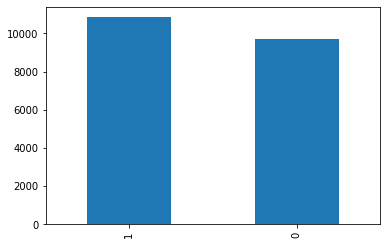

In [8]:
comment_data['label'].value_counts().plot(kind='bar') #data 분포 그래프를 통해서 확인하기

In [9]:
X_data = comment_data['comment']
y_data = comment_data['label']
print('comment 개수: {}'.format(len(X_data)))
print('rating개수: {}'.format(len(y_data)))

comment 개수: 20555
rating개수: 20555


# 불용어 제거 및 토큰화

In [10]:
normalized_text = []
for string in X_data.tolist():
    try:
        tokens = re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣]+", " ", string.lower())
    except Exception as e:
        print(string)
        break
    normalized_text.append(tokens)
print(normalized_text[:5])

['저 짧은 몇 마디에서 인성이 보이넴 ', '개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ', '정신분열 잼 ㅋㅋㅋ', '실력에비해 오래갔다', '거만이 하늘을 찌르네 뭔짓을 하든 묻지도 따지지도 말고 찬양만 하고 돈이나 바쳐라 이건가 ']


In [11]:
comment_data.comment = normalized_text
for sentence in comment_data['comment']:
    print(sentence)

저 짧은 몇 마디에서 인성이 보이넴 
개념없어 원래도 비호감 이었지만 하는 행동이나 말투 밉상 그자체ㅋㅋㅋㅋㅋ
정신분열 잼 ㅋㅋㅋ
실력에비해 오래갔다
거만이 하늘을 찌르네 뭔짓을 하든 묻지도 따지지도 말고 찬양만 하고 돈이나 바쳐라 이건가 
점점 왜저러냐 리더라는게 맨날 표정관리 못하고 기분에 따라 행동하고말하는거 진짜 별로다
말하는거 저급해 
말투가 왜저래ㅋㅋ
아무리 그래도 그렇지 말투가 저게 뭐냐 
왜저래 비꼰데 힘들면 그냥 조용히 탈퇴하세요 요즘 보면 얼굴도 어둡고 기분대로 행동하고 표정 다 드러내더만 이제 내리막길 다들 얼굴에 생기가 없고 초심도 잃은거 같고 배부르지 그만하고 쉬어라 다들 팬 많지 금방 썰물처럼 다 휩쓸려간다 너희 아무것도 아니다 배부른 소리하고 자빠졌네 비호감이네 진짜
아무리봐도 잘못 뽑은 것 같다
인기있을때 높은곳에 있을 때 말을 좀 조심할 필요가 있을 거 같네요 표현이 참 
인기도 좋고 다 좋은데 말투가 왜 그래요 어린 팬들도 많은 사람이
진짜 예민하네 
와 좀 깨긴 깬다 스트레스여서 그럴 수도 있는데 그래도 라이브 동영상에서 저런 말을 했다는게 당신이 그 자리에 앉아있는 것도 그런 관심 때문인 것을 ㅉㅉ
윽 진짜 말투 이런다고 
말 더럽게 싸가지 없게 하네ㅋㅋㅋㅋㅋ 니 성격대로 피코짓 하지말고 이제 힘든척 울지마 이 가식덩어리야
멘탈이 상당히 불안정한듯 제발 말과 글을 자제하고 행동을 조심해주길 
맨날 표정관리못하고 기분에따라 행동하고그리고 그만 우세요 
말은 조심히 써야 된다고 본다 그런 말투라면 모든행동이 가식적으로 느껴질거 같다 
어차피 이래저래 이미지 다 망가졌는데 열심히 쉴드 쳐라ㅋㅋㅋㅋㅋㅋ
인성 보소 
요즘 얘네 무슨 특권의식이 이렇게 심한지 모르겠음 회사 인성관리 한다고 하지 않았나 
깨진 건 너 얼굴이다
개돌았네
아 싼티나
언행이 참 가벼워보이네 ㅋㅋ 그렇게 안봤는데 벌레보이면 무시했어야지 똑같이 벌레짓 하고있으니 ㅉ
죽어ㅇㅇ 도움안되는 쓰레기
싸가지 없을거 같네
인기도별로없으면서 
깨진건 너 와꾸뿐 
왜 인기있는지

이건 역대급이다 
국보급 가수다 우리 모두가 아끼며 지켜야겠습니다
너무 좋아요
국민가수의 탄생
며칠전부터 알람맞춰놓고 기다린보람이있었네요 보는내내 가슴벅차서 울컥울컥했다는ㅜㅜ 
노래는 천재고 인성은 탑오브 탑입니다 사랑받기 당연합니다
사랑받기에 충분한 사람
당신이 있어서 이 세상이 행복합니다 
너무 예뻐요 
맛있는거 많이 먹고 푹 쉬세요 컨디션 조절 항상 잘하세요 건강해야해요 
넘좋네요 수고많았어요 
너무 멋지고 노래 잘하고 짱 
감동 감동이어라 넘 예쁘고 노래를 잘하니 뭐라 말로 표현할까요 굿입니다
진가 정말 대단하네요
심금을 울리네요 최고입니다 
꿈을 이룬다는 것 멋지고 훌륭하다
 세기의 최고의 연예인같다
울컥 사랑에 빠져봅시다
사랑합니다 진실된마음으로 팬과 소통해주세요 꼭 이나라에 한 획을 긋는 사람이 되어주세요
대한민국 원픽 
앞으로 계속 응원하겠습니다
가인님 대성하길 홧이딩
화이팅 
감동 그자체였습니다 뭔지 모르게 사람을 끌어당기는 힘이 있는듯합니다
어찌 그리 잘하나요 
와 정말 넘사벽이네요 응원합니다
이렇게나에게감동을주는가수는 처음
내 평생 첨으로 감동에 설레기는 첨이네
역시
잘한다 이쁘다 항상응원 할께요 
최고입니다 감동입니다 대박나세요
대박날것같네요
뿌듯하구만 
대박나라 좋다
다 잘하네 ㅋㅋ 만능 엔터테이너
진짜 대단합니다 화이팅 화이팅 최고입니다
앞으로 년후에도 남을 가수다 
역시 기대를 하게 만드네 
참말로 이뻐부러 몸매도 오지고 노래도 오진당께 
소름돋아요
방송보는데 마지막 왜 눈물이 날까요 ㅜ감동했어요
역시 인성갑 울컥했네요 
인성이 정말 좋은것같아요 항상 응원할게요
성격도 너무 착하고 마음이 좋은것같네요
진짜 신이네 후덜덜
티비보면서 계속 울었어요 감사합니다 훌륭합니다
최고다 이쁘다
본방사수
감동이었습니다 정말 심금을 울리더군요 사랑합니다 감동이 복받쳐 아직도 가슴이 져려오네요 사랑합니다
격이 높아지네요 정신없이 봤습니다 넘 시간이 빨리 갔어요 구
어른들이 왜 국보라고 하는지 알거같다 ㄹㅇ
눈호강 귀호강 감사했어요 
더이뻐보임 건강관리잘

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value



모자이크 안되나요 밥먹는데
진짜 뭣대가리처럼 생겼네
외계인 동물인가 
쟨모야 생긴게왜저래ㅠㅠ
인생을 어떨게 살면 얼굴관상이 저꼴로까지 더러울수 있지 
관상은 과학이다
진짜 생긴것도 뭐같이 생겨서 ㅡㅡ사상이 이상하네 ㅆㅇㅋ인가
넌 평생 그렇게 살꺼야 너는 절대 행복할수 없어 장담할게
씹다버린 껌 같이 생긴게
얼굴도 못나고 심보는 더 못났네 쯧쯧
정 신 병 자 
저샛기는 뭐냐 꼴뚜기샛기가
무개념
할많하않
페미충년들ㅋ진짜 정신병자 년들 대가리 부숴가지고 매장시켜야 함
하나같이 못생깄노
진짜 생긴게 피식 정말 얼굴이 다 말해주네 
일베 기생충 같네 풉 ㅋㅋㅋ
디게 못 생겼네
니같은애를 왜만나니
안 뒤지고 뭐하는거야 
얼른뒤지길 
찐따새끼 뭣같이도 생겼네
존나 못생겼다
너 인성 개쓰레기구나 ㅎㅎㅎ
아 못볼 꼴 본것같아 아침에 먹은게 올라오려고 하네
너 얼굴 보니까 토할거같아 조용히 사리고 사렴
자살안하고 뭐해 
죽었으면 좋겠어
오타쿠 찐따 스토커
다살해
참 못생긴 넘이 주접떤다 잠이나자라
관상은 거짓말을 하지 않는다
생긴것 처럼 어그로 잘끄네ㅋㅋㅋ
너는사람아니구나
와꾸 인성 비례한다는게 맞는건가 진정 ㅠ 니 얼굴에 침뱉지마
고릴라다
생긴거랑 똑같이 어쩜 으휴 극혐
어욱 내가 뭘 본 거야
열받아
관종의 시대라지만 ㅉㅉ
관종은 사회악
저래생겼노
못생겼다 
귓방망이 조낸 쳐 맞아야지 
주둥이 닥치고 살아
강냉이 털리고 싶냐 개씨발놈아
닥쳐라
세상은 넓고 별 싸이코는 많다 
소시오패스 사고방식이다 상대방 감정 공감 못해 
정신병자들 
새끼 악마네
괴물 
인간말종 새끼
한심한 인생이다
개소리 짓거리네ㅉㅉ
멍청
토나왔음
아 진짜 역겹다
뭐지 왜 얼굴을 공개했을까 했는데 이유가 있겠구만
개념자체가없더라 
이 ㅂㅅ은 안잡아가나 
옛날 불량감자같이 생긴듯
꼭너같은애들이 그러드라
저런 쳐죽일 색히
그 성별 한남이 또
그 성별 한남이네
뭐여 이 듣보잡은
호박같이생겼네
생긴대로 산다 진짜
왜 사냐 
감자가 잘자라야 포카칩
부모님 억장이 와르르멘션이다 새끼야
시발ㄹ놈
ㅅㅂㅅㄲ
저새키 고소안

이관종은언제쯤안나오나
가서 몸이나 팔아 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 남자들이 좋아해줄 듯 니 몸
제정신들이 아니구만 ㄷ ㄷ ㄷ ㄷ
정신이 온화하지못하구나전쟁나서다불타라삼청교육대 부활지지한다 
정신병 하 진짜 안보고 싶다 
개 관종들
정신병자 같어
역겹다 
정신병자다 
정신병인데 왜 태어났냐 ㅉㅉ
장애 아니냐 
부모도 딸도 정상은 아닌듯
역시 가정교육이 중요함 ㅋㅋㅋㅋ 부모의 역할이 얼마나 중요한데 ㅋㅋㅋ 딱 보니 ㅋㅋㅋ 답 없다 ㅋㅋ
보쯰에 염산 부어야함
여자끼리 물고 빠는건가 맛있냐 
사망기사 뜨면 올려주세요
자살해
토할거같아
당장 사형에 처해야한다
더러운것들 ㅉㅉ
골빈것
악플 유발자 어쩌니
미친다 
끼리끼리 만나는 거지 뭐 
아휴 또라이들
드러워진짜
ㅁㅊ것들
정신나쁜애들 여기도 두놈잇네 ㅉㅉ
관종ㅅㄲㄷ
정신이상자
드르븐그뜰
역겹다
더럽다
정신과 치료좀 받아야될듯
관종
관종들 ㅉㅉ
말세 그 자체 챙피한것도 전혀 모르네 ㅉㅉ
더럽다 기사에서 안보고싶군
관종
관종도 이런 관종이 없네
꺼져라
관종
진짜 ㅈㄹ
걍 또라이 관심 주지 말자
ㅈ ㄹ 들을해 ㅋㅋㅋㅋ
너네가 죽는다면 죽을 짓을 해서 죽는거다 ㅋㅋㅋ 아쉬워하지 말어라
관종 
너도 정신병원가서 치료받아야할애구나ㅉㅉ
개듣보 기사가 왜 올라오는지 이해가 안되네
사이코들 이런기사 진짜 싫다
솔까 티비나 인터넷이서 보기 역겨움
징그럽다ㅡㅡ 조용히들 살지 ㅡㅡ 
징그럽고 드러운것들 쯧쯧
빙신련아
꺼져라
관종중에최고 관종오브관종
ㅈㄹ들을 해라ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
왜 듣보년 굳이 기사써주는데 안물 안궁 빠이빠이요 
꽃뱀 추하다
참 한심하기 짝이없다
페미충들 퉷
얘는 뭔데 바퀴벌레 색기마냥 자꾸 기어나와 
지럴 들헌다 아주그냥 
진짜 한심한 인생 산다 
느그 엄마가 너 그렇게 가르치디 하긴 뭐 똑같겠지만 말이야
염병하네 ㅌㅋㅋㅋㅋㅋㅋㅋㅋㅋ
관종 끝 
뭐야 이 짐승은
그냥 죽어 병신아 ㅋㅋㅋㅋㅋㅋ너 죽는다고 아무도 걱정안하니까 그냥 죽어
관종중에 최고
어휴 관 종 ㄴ연들
괴상망측
어휴 관종 또 시작이네 지겨

다른가사 베댓이 관종 밀려서 일부러 노출한거래 ㅋㅋㅋㅋ 개웃김 ㅋㅋ
이건 역으로 시선 강간아니냐 몇번째야
여자몸을 그렇게막 공개하시면 어떡하나요 본인몸을떠나 이건 다른여성도 불쾌한 행동입니다 
시발 사람새끼냐
콩알 만한게 노출한다고 지롤이네 꼴비기실타
저건 개념이있냐 없냐의 차이인듯
넌 뇌가없어 
솔직히 좀 역겹다 
진짜 이정도면 병아님 
앞으로도 젖꼭지 자주 보여주시길 
부모 욕 먹이는 짖은 하지 않는게 사람의 도리다 참 너도 한심하게 산다 
관종이지 ㅠㅠ잊혀질만하면 터지잖아
잊혀질만하면 가슴으로 관심받고 브라 할 필요 없는 쬐깨난 가슴이 열일하네 
미친 제발 방송에좀 나오지 마라 애들교육에도 문제있나 
ㅋㅋㅋ관종
요즘 관종대결하냐 
관심 종자는 확실하고 개념이 없다 
관종 오브관종 진짜 대단하다
가슴도 절벽인데 뭐볼거있음
드럽
쿵쾅이 
얘 엄마아빤 있나요 ㅋ
그냥 관종이라고 본다 
관종 
수준 떨어져보여ㅋㅋㄱㅋ 더러운것들
찌질한 것
고소감아닌가요 눈배렸음
아니 이 팔푼이 기사 좀 내주지마라 자꾸 이러니까 신나서 더 저러는거 아니야
유명한 작품은 하나도 없다 매일 이런 뉴스로 유명해져요 
의도적 아닌가 정신이 이상해 
깡통아 뭔가 소신있고 자신감있으려면 머리좀채우고해 없어보여
무슨논리 머리에 든게 없어서 
보기흉하다고
애정결핍인가 왜자꾸 관심을 갈구하는지
극험수준까지 도달햇다 
좋은 영향력으로 검색 일순위 나올 수는 없나 한심을 넘어 역 겹 다
정신치료가 급함
노출병
지긋지긋하다 관종년 눈밑다크써클주름생겼네 이제 나이값좀 하세요
기본적인 예의를 모르는아이
애정결핍같은 느낌
시간만되면 관종짓이네 ㅋ
전엔 그냥 그런가보다 했는데 얜 진짜 관종 맞는것 같아 
더러워
관종짓 지겹지도않나 잊혀질만하면 저러시네
제정신은 아닌듯 
정신이 말짱한거맞냐
똥걸레
이년도 엥간히 관종이야
커서 저렇게 ㅈ 으로 관종될줄 몰랐겠지 
이쯤되면 얘도 관종이다 그렇게라도 관심받고 싶니 
얼굴도 개성없고 이쁘지도 않다 관종짓 혼자하게두고 기사쓰지마라 지겹고 신물난다
그저 천박해 보일뿐
무관

어지간히 관심이받고싶나봐 왜이래점점 꼴이보기싫을까
지랄이 풍년이다
정신병자처럼 무섭다
생각도 예뻣으면 
하나같이 표정 진짜 질린다 왜 저래 
모가 예픈겁니까진차 옹호기사보몃 사람 이 먼저 됩시다
보면볼수록 가오나시같어
소름
애쓴다 ㅉㅉ
얼굴은 예쁜데 꼭지가 안예쁜 그분이네
부자연스러움 억지로 
질린다 좀 
제발 쫌 
미져리
얘도 비정상인듯
겉만 예쁘면 속은 병자여도 좋다이겁니까 어휴
삼청교육대 보내고 싶다
비호감
이렇게 밥벌이하는거 쪽팔리지도 않냐 욕먹을래 
볼에 보톡스한것처럼 빵빵하네
돼지년아 ㅋㅋㅋㅋㅋㅋㅋㅋ
관종년 
으으 못생겼어
행복하냐 돼지야 
외모지상주의의 최대수혜자다 ㅉㅉ 한심하다
부럽다 재능도 없는데 그럼에도 불구하고 팬이 있다는게
믿고 거르는 얘랑 얘팬들
아가리 여물어라
진짜 소름돋게 생겼어 면상 보자마자 소름돋음
개정떨어지게 생겼네
똑똑한 척 하는 빡대가리
얘랑 놀면 거름망이야
이미지 진짜 좋았는데 이제 훅갔어 ㅋㅋ
환장한다 환장해
개극혐
미친놈
진심으로 욕나와
지랄이야
표독스러워보여
은퇴해주라
존웃ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ관종ㅋㅋㅋㅋㅋㅋㅋㅋ
돼지같아
식상하다기사거리
끊임없이 올라오네 관심도 없고 이젠 무섭다
손밖에 안보임 무슨 곰발바닥도 아니고 ㅎㅎ
어디가이쁘다는겨자꾸
머리는 항상 기름이 많네
머리좀 우예해라털빠진 짐승처럼 
역겹다
얼굴만 예쁘면 뭐하나인성은 별루인듯 
진짜 토 나옴 
 악플 정말 싫은데 달게 만드는 사람이네요
추녀 
어디가 이쁜데 당췌 
토나온다 
정말보기싫타 싫어싫어 예쁘기는 못생겻구만
이쁘긴 하나도 안이쁨 사람이 되어야지
진짜 소름돋네요 진짜 작작하세요
눈빛이 마녀
예쁜게 다가아니라는걸 느낌
무서운데 ㄷㄷ
허풍 허언쟁이
이상해 진짜 멘탈갑
내눈에 귀신처럼 보인다
꼭지가 안이쁘자나
요즘 저분 눈 왜저러는지 아시는분 가르쳐주시면 감사히 에어팟프로 최신형 선물로 드립니다
귀신컨셉 요즘보면 안이쁘고 너무 무서워요
소름끼침 본인은 본인이 쓴글 안읽나 
미저리같다 처녀귀신도아니고납량특집인가
대표적인 쓰레기 
아픈 사람이에요 
안이뻐

혜선씨 제발 정신차려요
정신적으로 많이 안좋은가 
부모들 가족들은 뭐하냐 애 안말리고
진짜 병원가보세요 
너무 싫음 진짜 너무너무 
할매젖 보면 있던정도 떨어짐
정신병자
질린다 
싸이코같아
평생 연예계 겉절이로 살다가 쓰레기이슈로 주목좀 받으니 스타된 기분인듯 옛다 관심 
와아 진짜 이런 사람이었구나소름돋는다 미친거 같아 
정신과 치료가 시급하다
싸이코 느낌 
진짜 불편하다 저런얼굴 눈빛보는거
이야 얘 소름돋는다 
살짝 정신이 ㅠㅜ
나만 무섭냐 
정신병같아 이런 사람인줄 몰랐다 
정신과 의사 님들 도와줘요
또라이
무서워
이젠 그냥 정상적이지 않다는 생각이든다 
진짜 누가 병원좀 
잘나가던 시절엔 참 인형처럼 예뻐보였는데 이번사건으로 사진보면 섬뜩 소름끼쳐 무서운 사람인거같아 보면 볼수록
분명 순한 얼굴인데 어딘가 표독스러워보이는 이유좀
정신 놓은거 같아 
제발 병원 좀 가라
나 병있다 홍보중 연예인은 이런것도 홍보하는구나 헐 가족들은 뭐하나 저렇게 병있다고 홍보하는데 병원에 넣어주지 ㅉㅉ
정신적으로 치료를 좀 받으시길 안타깝네요 ㅠ 정말 이런 모습 놀라울따름이네요
이 아줌마 점점 이상해지네 ㅠㅠ
병원에 강제 입원 시켜라
보면 볼수록 피곤하다 질릴만도하네 
병원부터 가보는게 
상ㄸㄹㅇ
윽 미저리같음 핸드폰 뺏으세요 가족들은 뭐하세요 
연예인들 왜 이래 다 이상함
아줌마 옛다 관심 처머거라
정신이 나갔는데 
유치해 
저정도면 정신분열이라고봐야해 ㅜㅜ 정신과치료가 급선무 주변에 저불쌍한영혼 도와줄 사람이 이케나없나 ㅡㅡ
문제가 있네 
그러네 진짜 데뷔후 계속 와이지였네 소속사 옮기면서 운좋게 빠진건가 대마 마약 성접대로도 조사받던데 그오랜세월을 안나가고 거기서 어울리고 있었다니 노답이네 알만하다
정말 자기만의 세상에서 사는것같음
병원좀 데리고 가라 입원 치료가 시급하다 
이정도면 뇌까봐야 할듯 ㄷㄷㄷ
그냥혼자살아 아ㅎ진짜 불쌍하다가도 이해못하겠다 진짜 십대도 아니고
첨엔 안타까웠는데 이젠 끄덕끄덕이 된다
연예기사 오늘도 헛짓거리 했나 궁금해서 봄 어디까지 하는지 끝

치아라 이제 기사도 그만할때안됬나 저얼굴보기도싫어
얘 쫌 이상한듯 
그냥 가만있는게 
지랄도 병이다
네 다음 관종
이상해 이상해
돌 중 젤 똘
쫌 정신적으로 이상한것같다 평범하진않아 
미친 사람 
아니 눈빛 이상한거 같은거 기분탓인가 
못났다 
걍 잠정은퇴 하는게 
무서워
강제 입원 안되냐 
진짜 자증난다 미성숙한인간
정신병이다 이 정도면
이상하다 무섭다
죽음으로길을정했구나 치유할수없는길로가는구나
조울증 
관종인가 
관종이야 좋게봤는데 점점 심해져
미친관종
얘 이상해
눈 똑바로뜨고 아랫도리 조심하고
이러다 자살할까 겁난다야
얘는 약빤 년 같음 진심ㅡㅡ
그냥 관종
생 ㄸㄹㅇ
지랄이노
혀 먹고싶다
제발 정신병원서 심리상담 좀 받아
역겹다
쓰레기년
ㅈㄴ예뻐 진짜
이쁘다 마냥 부러움ㅜㅜ
전보다 살더 마니빠졌네요 넘이쁨
진짜 넘 이뿌다
퐈이팅
얘는 그냥 뭘 해도 예쁘구나 
존나 예쁘다
멋지고이뻐요
아름답다
아름다움의 인간화
귀티가 좔좔 넘쳐 흐르네
예쁘다 
인성도 된 사람이잖아 얘
부럽다 예뻐서
진짜 넘 이쁨 배가본드 백두산 기대중
진짜 제일 이쁨
뭔들 최고 이쁘다
항상 열일 응원해
예쁘다ㅏㅏㅏㅏㅏㅏㅏ
드라마 영화 기대중
드라마 영화 다 대박나기를 
너무 아름답습니다 ㅎㅎ
언제나 응원할께오 
항상 예쁘다
키가크니까저런긴웨이브스타일하면진짜예픔 고급지다
개핫하구만
안구정화 마음정화
여신
사랑의 비너스 같아
여신이 있다면 이런 사람을 보고 하는 말이겠지
진짜 골져스 하다
이쁘당 홧팅
이쁘다
매일 보고싶다 ㄹㅇ
ㅠ매일매일 리즈 경신하네요 
힝 넘조아
겁나 예쁨
왜 이렇게 귀엽고 예쁜 아가씨일까 
정말 모두 다 사랑스럽다 예쁘고 마음씨 착하네 사랑해요 
미모 낭비하지말고 열일하자
대단하다 메인도 아닌 기사가 조회수 위에 밤새 화나도록 몰려올 미모라니 화이팅
외모지상 주의인 나라에서 제대로 성공한여자 
보고싶네요느무느무이뿌요
갈수록 더 아름다워지는구나 
화이팅
사랑해
오늘도 세상 혼자 사시는 미모
예쁜 얼굴과 풍성한 머리 숱이지 진짜 부럽고 예쁜 
수지 미모 보쇼 고급스럽고 자연

너무 이뻐요 
나이들수록이뻐지는게신기
인형이다 진짜 자연미인
진짜 예쁘다
항상 이쁠 여인 이쁘다 
예쁘긴 예쁘다
기가 막힌다 참 어찌 저리 이쁠꼬
가끔 이런 화장도 좋네 이뻐 섹시하고
비교불가 미모
진짜 예쁘다
완전 깜놀 넘 이쁘다 
차기작으로 빨리 보았으면 좋겠어요
실물 그냥 인형임 진짜이목구비 조화가 미친 인형 ㄷㄷ
다 잘 어울리네 
지금이 더 이쁘지
진짜 이뿌긴 하다
참 이쁘다
인형보다 사람이 더 이쁘다
존예다 진짜
인정
미친 미모 매력 쩐다
분위기 여신
이쁘기도 하다 
이제 누나 같당
언제나 이쁘니까 편히 살아요
여전히 이쁘네요
점점 더 이뻐지네 
많이 보구싶다ㅜ
좋은소식 기다립니다
넘 이쁘자나 인형이다
진짜 젤 예쁨ㅠㅠ
이쁘기만 하네
정말 너무 예뻐요 늘 응원합니다 
여신ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
인형 진짜 이쁨
진심 우와하네요
인형
인간 체리 그 자체
인형ㅇㅈ 너무좋아 
진짜 이쁨
늘 예쁘더만
예쁘다 
 년대초 애들이 이쁨
볼때마다 예뻐지냐
넘 이쁨 살아 있는 인형이 따로 없네요 항상 응원합니다
나이는 나만 먹는듯 
인형이다 
이쁘다
그냥 다 이뻐 
다른사진도 많던데 너무이쁨요 정말인간아님 
당신이 최고 여신 
 진짜 이뻐요 ㅎㅎ
이뻐요 
이쁘다
넘나 예쁘다
최고
시간이 지날수록 이뻐지시네요
흠 솔직히 개예뻐
이쁘긴이뻐 얼굴로는 까지말자
얼마나 덕을 쌓아야 다음생에 저런얼굴로 태어날라나 
너무 이쁘다 인형같아 여자 연예인중 제일 예쁜듯
하루종일 거울보고 싶겠다 
이쁜듯
대박 정녕 사람미모야 미모는 나이가 들어도 곱고 아름답다 
시파 얼굴졸라 이뻐 
와 정말 예쁘다 계속 예쁠거야
이쁘게 나이먹네 부럽다 
와 우아 섹시 여성미 다 있네
진짜 어쩜 이리 예쁠수있을까 ㅠㅠ
언니너무예뻐 
저 외모에 연기력만 뒷받침해주면 얼마나 좋아 
쫌 지겹다 새로운얼굴없나
고급지고 우아하고 예쁘고 모든분위기다되는 유일한 얼굴인것같아
역쉬 세젤예
느낌 분위기있는얼굴
리즈
예쁘네
이뻐요행복하세요
세상 젤 이뻐
이 언니는 왜케이쁜거야 
이뻐요
완전 이쁨ㅜㅜ
그림인 줄 포토

여시 남자들 간 빼먹는 불여시
불여시다 피햬
설마 저여자땜에 ㅍㅎㅎㅎㅎ허리를 왤케 감고 있어 징그럽게눈은 또 왜 그렇게 치뜨고 둘이 러브러브 보고있나 송중기 이러는거임 ㅋㅋ
비호감
참 별루다
표독스럽군
둘다 공허한 빈수레같은 뇬들
나오지마 기어나오지마관심없어 넌
겨드랑이 까만건 뭐지 단물 다 빨아먹어 아쉬움 없나븐지새로운 단물찾을 희망에 설레이겄지
역시 몸매가 짧아 
들락날락 멤버참화려해 다음은 누굴까
밥 맛떨어져저녁 ㅠㅠ
힘내요
미친
불여시
구미호
사진보니 가슴이없네 
ㅋㅋㅋ어쩔
궁금하지도 않네요
가슴이 없어졌네 
안물안궁
ㅋㅋ뻔뻔
별로
애쓴다
이상해
질퍽 질퍽 
겨살은 띵띵하네 나잇살인지
대중을 속인 결혼 이혼하면서 원래 누리던것 계속 누려보게 절대 그렇게 안되 당신같은 파렴치하고 양심불량 연예인광고 불매운동 벌일거야 니가 누려보자고 다른 배우는 짓밟고 올라간 댓가로 너도 당하게 해줄께
이혼을 꿈꾸는 대 대 꼴페미들 댓글 봐라 ㅋㅋㅋ 인생 조진건 송중기지 얘가 아니다 찌라시를 떠나서 이혼조정신청 자체가 상대방 송혜교 가 잘못이 있다는 전제를 두고 신청하는건데 얼마나 됐다고 저렇게 처 웃고 있냐 비정상인건 맞는거다 쉴드 적당히 처라 꼴통들아
과대평가 연예인의 대표
나중에 서프라이즈에 여자 카사노바로 나올듯 ㅎㅎㅎ
어 혜교 가슴 어딨어 
중국마녀같다
한국에서 활동도 안 하는데 왜 자꾸 광고에 나오지 내 눈엔 아직도 어글리 순풍 산부인과밖에 안 보인다 스폰있어서 갑자기 뜬거 아님 혹시 
빈약해
살 마니 빠졌네 이쁘다 
와 늙었다 모생겼다 
이혼하고좋댄다
나이는 못속임 
이제 싫타
독한년
독해보이게 나왔네
세월과 나이는 속일수가없구나
메가리없는 연기뿐 ㅜㅜ
심각하게 절벽이누
진짜별루다 
나도 이젠 별루 
헉 얼굴이 왜 저런 표독스러워 졌지
ㅉㅉ
볼륨실종 드레스 핏이 안사네 
ㅈㄹ
참 안타깝다 이런 삼류같은 노이즈마케팅 좀 교양있게 굴지
귀신같다 이쁜사진을 올려라 
보기 싫다 추하다
늙는다
눈빛 무서운디 
아줌마 자중하세요
응 다음 ㄸㄱㄹ
쥐어짜네
악녀같다 
참 저

이젠 그냥 관종이 아니구만
댓글 안쓰려했는데진심 미친년 부모님은 모하시는지 쯧쯧
ㄸㄹㅇ ㄱㅈ ㄴ들
그래서 뭐 어쩌라고 하는짓이 또라이들같다 이랬다저랬다 글케 관심받고싶냐 이런것들이 뭐가 대단하다고 누가 궁금하대 기사좀 그만올려라 할짓 드럽게없네 기레기들 
기자들이 한서희 인스타 보면서 기사 써주니깐 재밌어서 저러는거 아녀 관종들이 그냥 관종짓하냐 상대가 반응을 ㅈㄴ 잘하니깐 관종짓 하지 
미친년들이 널뛰기를 하네
관종도 저딴 관종이 어딧냐 걍 조용하게 살지
아 제발 관심 좀 끄면 안 되냐 사귀든 말든 그게 니들 사는 거랑 뭔 상관이야 계속 물어봐주니까 좋다고 날뛰잖니
미친년 퉤
관심받고싶어 안달이나셨네 지가뭐라고 ㅡㅡ
으으 
한심하다
대관종녀
클라라는 애교에 불과햇구나 관종짓
ㅈㄹ하네
병인가
정신나갔네 
정신이 이상한건가 왜 자기가 사귄댔다가 그런말 한적 없댔다가 사귄댔다가 누가 사귄댔냐 했다가 내가 잘못 이해한거야 
아진짜 토나온다가 여기에 딱알맞는듯해ㅠ
허언증 환자들 
기사좀내지마라 똘녀
피곤하다 꺼져라
관종 얜치료도힘들어 좀꺼져
꼴페미 레즈 불멸의 공식 이고 그 밑에 이용당한뚱페미들
이런애는 널렸다 ㅋㅋㅋㅋ 그래서 그중에서 자기가 더더더지랄발광떠는거징 ㅋㅋㅋ 니미 좉갔튼 애들 지랄 좉발광떠네 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
그냥 넘어가 관종은 답이 없어 
한심하네
머하는거니 
왜저러고사냐 정신수준이 초등학생이네
이런 미췬 
이래서 동성애는 정신병이라는 거다 
기든 아니든 상관없는데 어차피 관종이라서 저러는거 다들 아니까 
 가 낳은 괴물이다
관종또라이
살다살다 진짜 이런 관종 첨보네 심하다 심해 
정신병자들이구만
관심병 허언증 콜라보는 진짜 무적이다 ㄷㄷ
쟤는 왜저럴까 약간 무섭다
관종 두년
불쾌하고 더러워 
걍관종이네
ㅋㅋㅋㅋㅋㅋㅋ놀고있네진짜
ㅈㄹ도 풍년일세 ㅎㅎㅎㅎㅎㅎ
이런 걸 딱 관종이라고 하는 거다 불쌍하다참 
원래 관종
ㅋㅋㅋㅋㅋㅋㅋ ㄷㄹㅇ
듣보잡아 조용 그냥 알아서 살아 관심없거든 
안물안궁노관
육갑질 쩐다
 관종
인생이 뭐가 다 잡스럽고 진실이없어 


멋있어요 
와 진짜 멋있다 늘 응원해요 
멋지다
예술이네 와 
멋있다
대박 진짜 멋있어요
정말 대단하세요
멋있어
미쳤다 넘멋있어요ㅠㅠ
와 멋있네요 
대단하다 멋짐
누구 기죽이나 너무 멋져요
고져스 합니다
멋있음 ㅠㅠㅠ
역시 
대박 헐 소리가 저절로 나오네 
최고 존엄
충격적으로 멋있네 
멋있다
 멋지네요 
와아 감탄이 절로 나온다 
멋있다
아 정말 멋지다 
멋지다
너무 멋지심 
멋있다
와 대박 
와우 브라보 
소오 름 진짜 몇번을 봐도 멋있는 사람 
정말 멋지다 
멋져요 
대박 진정 멋진 프로
대박 멋있어요 
노력에 박수를
멋쪄부러
멋지십니다
대박 환상적이네요 응원합니다 
진짜 멋있다 
인정 정말 멋져
멋잇어요 완전 부러움
와우 진짜 멋져요 
당신은 정말 멋있다 
대박이다 멋있어 
멋진모습 응원합니다
늘 당당한 모습 부럽습니다 
멋있네요 
와우 멋있다 라고 밖엔 할말이읎다 
너무 멋있어요 진심
정말 멋잇다 항상 응원합니다 
와 진짜 멋있다 대박 
자기 관리하는건 진짜 멋있는거다 
진짜 멋져요 
진짜 멋있는것같아요 
멋있어요 
대박
감탄사만요 
인정 
빼박 인정 
와 멋지다 진짜 감탄 
너무 멋져서 말잇못 
멋있고 대단함 응원합니다
멋찌다 
넘사벽
멋있다 
멋지고 항상 응원해요
멋찌다 정말멋찌다 
급이다른 사람
멋있네
최고에요 
진짜 깜놀 멋있다 
멋져요 정말 
너무 멋있다 
멋있다 
멋지네 
아름답다 
너 무 멋져서 감탄만 나오네 
와 최고다 열심히 살아야지ㅠ
프로의아우라가 
쩐다 진짜 멋있다 
정말 프로같은 사람
멋있다 
정말 멋져요 
인생의 정점 
와 진짜 대단하다 
멋지다 
대단하시고 멋지네요 
와 이런게 예술이지
멋지다
봐도봐도 대박 멋있다
정말 멋있어요 
조각같다
항상 보면 자기관리 정말 잘하시는 것 같아요
진짜 대박이네
멋있다 
진짜 개멋있다
언제나 홧팅
멋지다 
대박 멋져욧
넘넘 멋진 사람
최고에요
멋지다 
언제나 파이팅이요 
멋지다 진짜 
멋지다
완전 멋져요
넘 멋져요 
멋져요 
멋져요 
진짜 멋있어요 
멋져요 
역시 멋지다 
넘 멋지다 
우와 

아니야 괜찮아 은퇴해 
역시 개ㅆ마이웨이 
관종이 평생직업아닐까 
멍청한 년
괴짜인 건 확실
살찐 개돼지 쿵쾅족발년
찐따오크
이게 뭔 개소리야 
역시못생기고뚱뚱한년
너무나 비호감
쿵쾅이
쿵쾅이 노출하세요
김치녀
정신병자
분위기 여신
독보적인 연기력에 신비로운 이미지까지 당분간 경쟁자가 없을 듯 싶다
진짜 년대 배우느낌도나고 다방면으로 매력 있는듯 
요즘 찾아 볼 수 없는 마스크임 
계속 이대로 롱런해주길
뭔가 예쁘다기보다는 아름다운 분위기ㅠㅠ 넘 좋아
세련되어보인다
솔직히 발음하고 발성은 진짜 독보적인거같아
목소리 분위기 천만불
역시 성형미인과는 다른 아우라가 아름다워요 절대 지금 마스크 그대로 연기해주면 좋겠네요 
단아미 고전미 우아미 세련미 다나오네
요즘 이만한 배우가 없는거 같다 
신인이 엊그제였는데 어느새 탑이 됐어
성형 미인이 낼수없는 무언가가 있네 
기품있게 생긴 외모라는 게 참 어울리는 배우임 
아름답다라던가 분위기가 사람 확 끌어당기는 어떤역을 맡아도 잘 어울리는 듯해요 좋은 배우가 되주세요 
연예인 방송인이 아닌 오랫만에 보는 진짜 배우다 
분위기가 독보적이고 너무 아름답다
예뻐
진짜 예뻐보임 신기함 
진짜 독보적인 매력인듯
발견한 눈을 칭찬하고 싶은 보석같은 배우 분위기며 연기력이며 
너무 예쁘고 당당하고 기품있다 
내면의 자기 사랑이 아름다와 보이게 하는 것 같다 
우아하고 고혹적이고 세상흔한 이쁜 미모랑은 다른 특유의 아름다움과 부드러움이있다 
정말 매략적이더라
와 분위기 하나로 모든걸 씹어드시넵
진짜 이뻐
타고난 분위기는 성형으로도 못따라옴 
연기도 잘해서 좋음
진짜 또래 연기자들 사이에서 독보적인 인물 
연기도 마스크도 
앞으로가 더 기대됨 
진짜 연기만 탄탄하면 더 멋있어보임 역시나 
배우중 최고다
연기를 어쩜 그리 잘해
매력잇는배우인거같다 넘예쁘고 귀엽고 톤도 매력적이고 
고급스러운 분위기가 풍겨요 얼굴도 조막만하고 키도 생각보다 크고 잘되어서 너무 좋네요 
저런 분위기는 성형으로도 못만들지 
어떤 색이든 낼 수 있는 분위기를 갖고

관종에 가슴 다까고 사진 올리고 ㄲ리긴함ㅋㅋ
 년 김치
돈없고 뚱뚱하고 못생겨서 뭘 하지도 못하잖아 에효 ㅉ
남자들은 저런 빨통에 마음이 흔들린다 유부남도 예외없이
메퇘지
자살해
ㅆㄹㄱ 
도도맘인줄 얼굴과 몸매는 되지만 개념은 꽝인듯
가슴 골반 내놓는 사진만 올리는 것 같은데
역시 여자는 콜라병 몸매여야 해 오 가슴 
인스타녀 특징 얼굴 성형 가슴 성형 엉덩이 사진 운동사진 
특히 미드와 허리 골반 힙은 그냥 유승옥 찌발라버림 
가슴까녀
과하다
더럽다더러워 ㅉㅉ
누군데 난리지 남편은 없나요 
그냥 관종 이라는 말밖에 ㅎㅎ 
연예인병 걸렸네
그냥 정신병자 같더라
듣보잡 어그로 성공ㅋ
짜가저탱이 자랑하고 싶나
오또맘 젖의 크기보다는 질감으로 승부하시는 분 
꼴페미 메갈 쿵쾅
무슨무슨맘들은 죄다 관종 같아
이분 스폰제의 엄청 온다는데 남편이 스트레스받다 이혼한듯 
관종
관종이네
남의 가정에 꼬리친죄로 처벌해
관종ㅉㅉ
지럴
아줌마가 미쳐날뛰네
사진이 죄다 쭈쭈 다들어내고 어휴 ㅉㅉ
든보잡
장성규 잘못없다 저여자가 관종
엄마라고 가슴까면 관심종자
가슴이머자랑꺼리라고 쪽팔리는줄알아
별걸 다 ㅈㄹ하네ㅋㅋㅋㅋㅋㅋㅋㅋ 
개웃기네 ㅋㅋ
엄마자격 없어요
딱 수준이 보임 천박 ㅋ
가슴왜저래
오또맘이 누구냐고 맛있어보이는 년이지
사회악 맘충 페미논
ㅉㅉ진짜 저급하다
어플보정으로 사진 찍고 인스타올리는거 극혐
이름도얼굴도 모르는사람들입방아에 오르락내리락하는게 좋은가 것도 다쳐벗은 몸으로 에휴 한심하다한심해 
냄새나는 쿵쾅아 퉤 ㅗ
저런것들이 범람하니까 애들도 이상한거배우고 성폭행하지
오래전 사진엔 가슴이 납작하시던데 
이쁘지도 않구만 너보다 이쁜 몸되더 너처럼 처박스럽게 안보이고 안 찍는다
한떡하것네
 키로 김지영
쿵쾅이들 김치들 맘충년
술집여자 같다 
정신 나간 쿵쾅이들은 다 두 져야 도ㅔㅁ
아줌마
겨울인데 잘익은수박이 먹고싶네아삭아삭 맛있는걸로 
악플이정도가심하네진짜
인기 끌려고 하면서 욕지대로 먹는여잔 이여자 뿐인듯 그것도 그럴게 애는 무슨 잘못이야 애가 커서 친구들이 너희엄마는

자살시도가 실패해서 정말 아쉽게 됐다
여러분제발 저기 인스타 들어가지마요 굳이 왜들어가요 이런기사도진절머리난다
기자가 더 문제인듯 ㅋㅋㅋㅋㅋㅋ 누군데 자꾸 긁어오냐
아니 기자분 진짜 일반인 관종기사는 정말 올리지마세요 네이버에서 제목만봐도 기분 더럽고 똥밟은 기분이니까요 ㅎ
찾아가서 볼 만큼 관심 없는데 기자들이 문제인듯 댓글 달게 만들어
얘 왜이럼 
추하다
얘는 편들고 싶지 않아 말그대로 관심종자 
못생겼다
와 생각보다 더 심한 관종이였네 불쌍하다
한서희 이혜성 장성규 클라라 아주 심각한 관종 중환자 상담이 심각해보입니다
별그지같은애 기사는 왜자꾸 쓰냐
관심종
관종같아 
관종
관종에게 먹이를 주지마시오
얜대체 직업이 뭐임 정신병 맞는거같은데 치료좀 받지 
지입으로 밝히기 ㅋㅋㅋㅋㅋ관종
관종은 관심없으면 죽어
뇌상태가 궁금해
공해다 공해
관종이십니까 
인스타 관종 과학
이정도면 정신감정받아봐야하는거아냐 주목받지못해 안달난 사람같애 
이관종은누규 나대지좀마라
역겹구나 진심
관종중에관종미이친관종
관종은 못고쳐 평생간다 
관심받고 싶어서 어그로 끌었니 옛다 관심
그냥관종
부모가 죄인이다 자식잘못키운 죄
진짜 관종 
관종들은 무섭다
리얼 도 ㄹ 아이
그냥 관종 댓글 달지말자
그냥 대관종러
응 잇어 핵폐미관종쓰레바퀴 빨갱이
줘도 안먹음
얘는 누군데맨날인터넷실검에올라 슬슬짜증나네관종의도를넘어서 정신적으로문제가있는거아니냐이정도면
노답
ㅁㅣㅊㄴ
ㄸㅇㅇㄴ
진짜 어그로는 더럽게 잘끄는구나 욕하면서 인정한다
의사들 정신병자 대하느라 힘들었겠다 
오늘도 개소리는 멀리 울려퍼집니다
엄청난 관종
진짜 심각한 관심병자네 지치지도 않나 아 진짜 이런거 관심없는데 쟤는 정말 안나오게 차단됐으면 좋겠다
관종 끝판왕이네 ㅋㅋ 죽을뻔했다고 알아달라고 인스타 ㅋㅋ 굳이 죽은 구하라 찾아가서 추모하는척 ㅋㅋ 아마 인스타 댓글 하나하나 다 보고 기사 댓글 전부 보고 희열 느낄듯 ㅋㅋ
관종 ㅉㅉ
관종 기사 좀 그만써라 
질알이 풍년인 현장이군요
의사가 배운사람 맞다 폐쇄병동에 넣자
욕하지마 씹새야
병원

정말 오랫만에 댓글달아요 ㅎ 역시 오늘도 많은 미담보고 팬으로서 미소가 절로 나네요 
행복하시고 작품활동 많이해 주세요 차기작 소식 빨리 듣고싶어요 
이 분도 참 이쁨
진짜 내추럴하게 이쁘심 ㅠㅠ
저 얼굴로살면 어떤기분일까 ㅜㅜ
진짜 이뿌다 
진ㅉㅏ부드러운 이미지둘다 넘 좋음
이뻐요 예능에서 뵙고싶네요
내 이상형 
예전에 팬 되고나서 아직도 팬이에요 
넘나좋아여 
넘 이쁘다 계속 이쁘게 살길
이뿌다 
보기좋다아아아앙 부럽다아아아아아앙 ㅠㅠㅠ
청순한미모는 인정 
꽁냥꽁냥 잘사는 듯 
이쁜언니
고우시다 
너모이뿌닥
항상 착해보임 행복하길 
아 진짜 너무 이쁘네
이뻐요
이쁘네
이쁘다 
이쁘당 
예뽀예뽀요 
너무 이쁘다 
갈수록어려지고예뻐짐 
행복하세요 
어떤 것을 해도 어색하지 않고 잘 소화시키는 것 같아요 참 부러워요
언제나 예뻐 ㅠㅠ
연기보고 소름돋음
깔끔하게 반듯하게 잘생겼다
잘생김의 정석 
옷에 따라 헤어스타일에 따라 새롭네요 
멋져요 
우와 존잘이야 
실물보고 진짜 감동함
얼굴 진짜작음
실물이 오조억배 더 잘생겼음 인간 아닌줄ㅠㅠ
인생은 이 사람의 실물을 보기 전과 후로 나뉜다는게 학계의 정설ㅠㅠ
실물이 몇백배 더 잘생김 화면이 다 못담음
당신 정말 다 가졌구나 
사진 다 멋있다 ㅋ
귀티나게 생기기도 했지만 연기력이 뛰어난 배우라 더 좋다 
얼굴에 군더더기라곤 도 없이 깔끔하다
매력 무엇 정말 최고네요 연기도 잘 하시고 넘 멋져요 늘 응원할테니 건강만 하시길 
실물이 훨씬 멋짐
잘생쁨의 정석 
소년미 냉미남 다조아 다인정ㅋㅋ
진짜 사랑해 너무 섹시한데 귀엽고 청순하고 하 진짜ㅡ
머시썽
내가 좋아하는 배우라서 행복ㅋ 연기 잘해 팬됐지만 지금은 됨됨이 인성에 반해서 못 헤어남 오래오래 응원할게ㅠㅠㅠㅠ
반듯하게 잘생겼다 
헤어스타일에 따라 분위기 다르네
소년미부터 냉미남까지 스펙트럼 넓은 사람 인 것 같아ㅠㅠ미친존잘
외모 연기력도 최고지만 바른 인성이 더 맘에드는 배우님
너무 멋지네요 천의 얼굴을 가진 배우님 천상 배우이십니다 최고예요 
천의얼굴 만의얼굴 
작은

이게 사람얼굴에 가슴은 왜저렇게 크노 ㅋㅋ징그러
정신이 일반적이진 않은거 같음 
빨통 절나 크네 그래 미친년스럽다 
젖또마떼 구다사이요 
엉덩이 사진 좀 치웁시다 칭녀예요 
음 수박만한 열매가 두개나 달려있네
외괴인 존나 무섭다
얼굴이 왜 저렇노
처음뵙지만 솔직히 병맛같이 생겼네요 ㅅㅂ 안본 눈 기증 받습니다
얼굴보다 더커 세상에나
얼굴본판이 없네 전부 깎았네 예쁘다고 하는사람 이해안감
목소리는 왜그래 트젠인줄
가슴도 키웠냐 에라이 여기서 더럽게 놀고자빠짔네 듣보가
 수박 이냐 
옷이나 똑바로 입어라 눈꼴 사납다 그딴 옷차림으로 무슨말을 한들 신빙성이 있겠냐
맨날 벗방하다가 마약까지 했나보다 딱봐도 여자가 제정신 아니네 ㅎ 정준영도 급이있지 아무나 단톡방에 넣어주냐 ㅋㅋㅋ
저러고 입고 다니고 사진찍고 할말없을듯 뽀샾이든 뭐든 몸으로 뜨려는거아닌가
로봇인가 인간인가 수박만한 젖
벗고 술처먹고 별짓거리 다하면서 돈도 천하게 버는 구걸충거지듣보새 끼들주제에 지들이 뭐라도 되는거마냥 사과문은 뭔 사과문ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ아니 얘네가 뭐라도 돼 좀 꺼져라 눈에 띄지말고
사람이 아니고 무슨 일본에서 파는 고무인형같이 생겼네 머리에 든거 하나없고 그냥 너저분한 레 같아
정말 천박의 극치로 보이네 
징그럽다
사진 너무 징그럽다 윽
성인 넘저질 
인조인간 로보뜨
이건 열폭아니고 진심 사람같지가 않아서이쁘다 안이쁘다 판단이 안선다마네킹같아
뭔 가슴이ㅋㅋㅋㅋ 부담스럽다
으 미친년 남자들은 무조건 가ㅣㅣ슴 큰 여자들만 좋아하는거야 더럽다
맛잇겠네 
뭐하는 애인지 모르겄지만 뽀샾좀 적당히 얼굴성형 젖성형인가 뭔가 비정상적인 몸매인데 
좀 진짜 아 짜증난다 이런 찌질이들 뭔 방송이야
듣보잡 둘이서 뭐하노 
성괴에다 괴물같아보이네
진실은궁금하지않고 걍 더러운데 
괴물이네
베트남 아줌마냐 
아 이 여자 존내 극혐이다 수술도 할려면 적당히 하지 이렇게 티나게거대하게 우웩 
와 진짜 여자 성형 삘 너무 많이 난다 전형적인 강남여자네
가슴부터 얼굴까지 인조인간이네
가슴에다 뭘 넣은거야 ㄷㄷㄷㄷ

진짜 갈수록 존예
좋아요 좋아 
매력터지네 도도햐보였는데 인간미 넘침 
연기 기대할께요 굿 
고정했으면 좋겠어요 소소해서 보기 좋았어요
간만에 조금 웃겼다 고정 가겠던데 
손담비 되게 웃기더라 ㅋㅋㅋ 손담비가 다했음
원래 배우들나오면 개노잼인데 의외로 재밌더라 ㅋㅋㅋㅋㅋ
 옮길때가 제일 웃기던데
진짜 꿀잼 ㅋㅋㅋㅋ 꽈당
귀여워 ㅎㅎ
완전 반전매력 ㅋㅋㅋㅋ 스쿠터타고 넘어지는거 진짜 웃곀ㅋㅋ
ㅋㅋㅋ앜ㅋㅋ웃곀ㅋㅋ매력터져요언니
ㅋㅋㅋㅋ스릴넘치게 봤어요
재출연 원츄요
간만에 재방 볼 만한 방송 이었음 
보는 내내 무슨 스릴러를 보는듯 두주먹 움켜쥐고 긴장하고 봤네요 어찌그리 불안불안하게 생활하시는지 여태 큰사고 없었던게 축복이다 싶어요 간만에 즐거웠네요 
개웃기던데 나보는거같아섴ㅋㅋㅋㅋㅋㅋㅋㅋㅋ 손으로 하는거 다못해 내가 늘 듣던말이라 순간 움찔ㅋㅋㅋ
간만에 재미있게 보았습니다 
엄마랑 다른 프로 나와도 재미있을듯요 
행복한일상보내시다 좋은작품으로 또 보고싶어유 홧팅
진짜 빵 터졌음 ㅎㅎ 오랜만에 소리내서 웃었네요 ㅋ
반전매력이 딱 어울리네요차가운 이미지였는데 완전 허당미 넘치는게 더 매력적이네요
밉지않은 허당 귀엽네요 
디게성격 좋구 허당이고 ㅋㅋㅋ 어머니가 시집 잔소리 하는거 ㅋㅋㅋ 전국의 미혼들이 공감햇을듯ㅋㅋㅋ 별로 조아하지 않앗는데 어제 보구 호감됫음 진짜 나혼자산다랑 딱 어울리는 게스트였어요 
어제넘잼있었어요 
새로운 분들 기대하고 보는데 나올때마다 좀 실망하고 잼 없었는데ㅜ어제 ㅋㅋ 재미있었어요 ㅎㅎ 그냥 유쾌하고 있는그대로 ㅎ
기대하나도 안했는데 재밌었음 오바도없고 자연스러워서 보는데 부담이 없었음
진짜 너무 웃김ㅋㅋㅋ 멤버들 일상보다 더 웃김ㅋㅋㅋ티비 옮길때 왤케 웃긴지ㅋ
너무 이쁨 
크게 관심없었는데 뭔가 어제는 좀 매력적이더라
아 진짜 옆에서 다 해주고 싶었음 깻잎 차이로 지켜낸 것 웃겨서 죽는줄 ㅋㅋ
이쁜데 나 이쁘다 이게 없어좋다 너무 이쁜척해도 별로거든 어제 넘 재밌게봤어요 
너무이뻐요 혼자살지만 내실있게 행복하게 사는거같아서보기좋았어요 부러

진짜 인격이 궁금하다
진짜 진심을 울리시는분 
진짜 찐어른이네요 우리는 척하며 사는데정말 마음이 곱고 깊고 젠틀하신분이네요 정말 착하게 사니 복받고 선한끝은 있는법 
진짜 가 보이네요
진짜는 누구눈에나 보이고진심은 속일수가 없나봐요
진흙탕같은 연예계에 핀 연꽃 같은 분
진짜 감동이다 말 하나하나가 진짜 같다 행복한 음악활동 원없이 즐기며 그 진심 늘 살아 숨쉬길
진짜 너무 놀라워 패션감각 분위기 어느 누가 따라갈수있을까 
진짜 너무 멋진분 
진짜 말씀들 자체가 감동입니다많이 배우고 느낌니다 흥하세요
진짜 말을 너무 예쁘게하십니다 형님ㅎ 배우고싶네요 오늘도 리베카를 흥얼거림ㅋㄷ
진정한 팬을 두셨네요 두분 다 넘 멋지세요 대한민국에서 맘껏 꿈 펼치시기를 힘껏 응원합니다
진정한 팬이라면 모두 같은 마음 이겠죠 늘 잘되시길 응원합니다 
진짜 선한 영향력을 주시는 준일님 최고에요 앞으로도 잘되실꺼에요 건강하시고 우리곁에 오래오래 있어주세요 준일님은 아름다운 꽃이세여 
진짜 세상이 모두 변해도 이 분은 변하지 않았으면 좋겠다 뭔가 이 분 말 가만히 듣고있다보면 그냥 따뜻해진다 
진짜 슈가맨 근데 이젠 멋진 연예인도 됩시다 많은 사랑받는 멋져요 행복만 하세요 몸도 챙기구요
진심이보이는사람
진정성이 있어서 더 좋다 팬들을 소중하게 생각하고 인성도 좋은사람 앞으로 더 잘될 양준일 화이팅 
진정성있는 아티스트 그의 행보를 응원합니다
진정한 아티스트 말씀 하나하나도 진심으로 와 닿고 멋져요 
진실하고 겸손해서 감동받는거다
진심 말하는게 다 품격이 있고 위로가되는 느낌 대인데 어제방송보고 위로많이 받았어요
지금부터 팬들과 함께 걸어가요 응원합니다 
지금 그대로의 모습이길 
지금 들어도 노래 너무 좋은데 와 대박 ㅠㅠㅠㅠㅠㅠ멋있어요
팬으로 사랑합니다
정말 알면 알수록 참 존경스럽고 아름다운 사람이다 참 깊은사람
오빠의 모든것을 응원합니다 우리들 곁으로 다시 돌아와주셔서 고맙고 감사드립니다 
형 화이팅 
매력덩어리 
준일님은 이야기 하나하나가 너무소중해요 자주 보고싶어요
정말이지 사람

어떻게하냐 이제 학부모 티나네
더 늙어보이네
한효주 그냥싫다진짜연예인 싫고 좋은것없는데 얘는인성이 그냥싫음
왜이리 아줌마같냐
늙는구나
흔녀됬다 살짝싼티
기자가 빨아준다는게 이런거지 
진짜 못생긴 년들은 죽어도 할 말이 없는거 아니냐
동네에 이런 줌마 만습네다
앗 쌍수 아 초큼 나이들어보이는데 아쉽다 
촌스럽게 손받네
나이든티남
네 실화맞아요 쫌 아줌마스러운거
눈 했네 이쁜친구들 더많아요실화까지 늙었고만 
나이가 들어보이네
계속 얼굴 건드리는거도 중독이더만 ㅉ
외국을 성형을 하러 간건가 딱봐도 눈하고 코있는데가 나 성형했소 표가 나는데 턱도 머리에 가리고 더 부자연스럽고 이상해졌는데 뭔 미모 없고만
얼굴이변했는데 왜 나이 가확들어보이냐 노화가실화냐 이렇게기사가나와야지
살이 늘어져 쌍겹짐 동안 얼굴인 줄 알았는데 세월은 피할 수 없는건가 
눈이 느끼하군
노양심 ㅉㅉㅉ
리모델링 선수급이네
아줌마
갑자기 확 나이가들어보이네
관리잘한초딩부모 ㅋ댓글왜케공감가냐 학교에진짜많아요 저정도미모엄마들
눈하니까 더 이상해ㅜ 왜햇지
치아도 이상하구만 인위적인 듯한
착한척좀 그만했으면 좋겠어요 진짜역겨워요 
입이넘 크고촌시려 이민정하관
눈이 더 가까워지고 코도 이상하고 더 노안인데 더 노안됐네 더이상해졌는데 성형 엄청 해대는구나
이 여자는 실력에 비해 과장포장 되어있다 한마디로 거품녀 한지민하고 비교 하지 마라라 개는 연기라도 잘하지 난 쿵쾅이도 아니고 악플달고 싶은 마음도 없고 그냥 주관적으로 내 생각을 적은 것이다
극혐 거울은보나
쌍거풀하니 나이들어보임 원래 자기눈이 제일 좋은거
결혼안한ㅊ아줌마다
쌍수가역겹다
걍나이든줌마상이네
ㅋ비호
쌍수 개망했네 어떡하냐 ㅋㅋㅋㅋ
최악의 세대 재활용도 안될쓰레기
 동네아즤머니
큰바위얼굴
아줌마 눈 우째
그냥 언플 잘하는 여자 연예인
양꺼플 눈밑애교 양악까지 했는데 옛날청순한 모습이 이쁘네요
눈 위 아래 다 손봤네 
느 느늙어따 
싼티나는 성형녀 됐구만
참 용됐다 야도
쌍수하고 애교도 넣고 얼굴은 넙대대 안이쁨
한효주 하관 이상함 예쁜 거 같으면서

그전컨셉 시즌 이랑 너무 비슷 근데 어설픔
근데 쫌 재밌다 ㅋㅋㅋ
기다렸는데 기다라 보람이 있었어요 너무 재밌었어요 
기다렸어요 화이팅 대박나세요 
기다린 보람이 있네 다음주도 본방사수 ㅎ
기다린 보람이 있네요 각각의 매력이 보입니다 건강하게 롱런하시길 재밌게 잘봤어요
기다린 보람이 있네요 ㅎㅎ 간만에 웃었습니다 정말 대박 ㅋㅋㅋㅋ 첫 출발을 좋게 시작하고 싶었다는 그 진심이 느껴짐 
기대 마니핸는데 역시 잼나는군 여자 분 멋짐
기대 안하고 봤는데 재미있었음ㅋㅋㅋ
기대 안했는데 진짜 재밌다 ㅋㅋㅋㅋ
기대 안했었는데 보는 내내 넘 잼있었어요 웃다 끝난듯 
기대 이상의 너무나 재밌게 봤어여
기대 이상이네요 ㅎ담주도 기대기대 합니다 홧팅 
기대됩니다신선한 조합이넌요 
기대를 안해서 그런 건지 몰라도 생각보다 자연스럽고 재미있던데 조합 괜찮고 
기대를 져버리지 않는 종민님 다시 보게 되어 반갑고 늘 한결같은 모습 응원합니다 
기대보다 훨 재밌었음ㅋㅋㅋㅋㅋㅋㅋㅋ 선호님 넘모 귀여움 예능 뽀시래기ㅠㅜ ㅋㅋㅋㅋㅋ 그리고 딘딘님도 까나리카노 ㅠㅠ 계속마시고 열의가 참 좋게보이더라구요 화이팅입니다요 
기대안하고 봐서 그랬는지 몰라도 첫방은 나쁘지 않았습니다 초딩때부터 정말 열심히 보던 프로그램인데 시즌 만큼은 못하겠지만 잘되길 
기대안하고 봤는데 넘 웃겨요멤버가 신선했어요
기대안하고 봤다가 빵터졌네요 멤버들 꿀조합 앞으로 열심히 챙겨볼께요 
기대안했는데 넘 많이 웃었어요 신선하네요 캐릭터들이 와 까나리 대박이었음
기대안했는데 생각보다 넘 재밌어서 의외로 완전 많이 웃음 멤버들이 순수해보이고 확실하게 중심잡고 잘하는것같음
기대없었지만 배우님 때문에 봤다 기대이상 담주도 챙겨볼꺼임 
기대없이 봤는데 너무 재밌었어요ㅋㅋ최고ㅋㅋㅋ
기대없이 봤는데 넘 재났어요 시끄러운 멤버없이 조용히 웃겨서 더 좋네요 
기대없이 봤는데 생각보다 재밌었음ㅎㅎㅎ
기대없이 봤다 좋은조합이네 
기대이상 재밌다
기대이상 웃음폭탄 멤버전원 멋져요 끝까지 좋은 모습 으로 일요일밤 시청자분들의 안방을웃음바다로 만들

와 첫방 너무너무 재밌게 잘봤습니다 진짜 꿀조합인듯 기대됩니다 
완전 꿀잼
우려와 달리 존잼 김선호 허당미 귀엽다
우리가족 웃으며 휴일예능시청했네요 담주도 기대 
우리집 할매도 사춘기 아들도 웃었으면 재미있던거지요 아니라고 하는분들은 왜 보시는지 재밌고 좋았습니다
우연히 봤는데 그냥 웃기네요 ㅎㅎㅎ 명 모두 개성 많고 성격도 무난한 듯해서 보기 좋습니다 적극 응원합니다
울 배우님 화이팅
웃겨서 죽는줄 알았네 신선해요
웃으면서 봤어요 ㅎㅎ스타트가 좋네요딘딘 엄지척 이 맴버들 활약 기대합니다
으외의 조합 ㅋㅋㅋ 화이팅 입니당 ㅎㅎ 느므좋아요
의외로 재미있었음 의외네
의외로잼썼고 선호귀여워 
이 구대기프로 또하네
이 시간대 오랜만에 웃었네요 가족이 다 모여 휴대폰 한번 안 보고 웃은 날 선호 보여 눈호강까지
이 시간때에 볼게 없어서 보는데 얼마나 할게 없었으면 폐지된걸 또 하는지 진짜 이해불가 ㅋㅋ 자존심도 없는지 나영석 가 버리고 간걸 주어먹는건지 인재도 없나 거진가 ㅎㅎ
이 조합 괜찮다 튀는 멤버없고 김종민도 선배 노릇안하고 딱 좋아
이거 아직 하냐 
이거 완전 재밌었음 
응원합니다 
응원해요 
이번 멤버들 조합 의외로 괜찮고 너무 재미있었어요 앞으로도 본방사수 열심히 할게요 출연진 분들이 악플에 상처받지 않으셨으면 좋겠네요
이게 재미있냐 핵노잼
이게 잼잇다고 깝치는 댓글은 알바인가 회안에 폐지해라
이노잼 프로를 아직도 하다니ㅎ그걸 또 보고 있는 사람이 있다니ㅋㅋ
이따위로 만들거면 슈퍼맨 시간 왜 바꿈 
이미지세탁하고 인맥늘리려 하는건데 방송 이미지에 항상 속고 또 속는 호구들 많구나
이상할꺼라 생각했는데 저는 시즌 보다 좋았어요ㅋㅋ
이조합 이렇게 케미가 최고일줄이야각자 자기할일을 아주 잘하는듯 계속 기대될듯 첫방보고 확신 믿고봐도 될듯
일단 첫방은 잼있었어요 
다시 살릴수나있나그러고 봤다가 많이 웃었다 예상밖임 
일요일 오후에 볼 거 생김ㅋㅋㅋ 존잼
자막도 겁나 웃기던데ㅋㅋㅋㅋㅋ 연정훈 국민 도둑놈 이랑 라비는 이제 자유예요 ㅋㅋㅋㅋㅋㅋ 젤 웃겼음ㅋㅋㅋㅋㅋㅋㅋ

서로 잘 만났어요 본인들 복이죠 행쇼 
서로를 존중하는 모습이 보기 좋다 
설연휴에 좋은글 남깁시다 예쁘게 잘 사는 가족에게 아름다운 글을 써주지못할거면 들어와 댓글달지마세요 왜들 이리 삐딱하게들 사세요 ㅠ 네 식구 건강하고 항상 행복하세요 
슈돌 윤정님 가족 나올때 넘 내가 행복해용 분량 늘려주시고 파이팅입니다 
슈돌로 중독된 팬입니다 선플 또 올릴게요 연우네는 사랑입니다 너무 좋아 어째 
슈돌에서 가정적인 모습 잘 보고 있어요 서로 잘 맞는 분들끼리 결혼 잘 하신 듯 연우가 너무 귀여워요 
슈돌에서는 안봤으면 재미가 없다 진짜
시댁에서 웃고있는모습이 너무예쁘네요 정말 편하신가봐요 아주아주보기좋습니다 
실제로 이야기를 나눈적이있는데 정말 마음이 곱더라 행복하시길 아들 넘 사랑스러워요 감동받아서 눈물났어요 ㅜㅠ
싫다
아들 교육잘시키고 열심히 살고 그러면 됐지 더이상 뭐가필요하리오 이쁘기만들 하구만 
아들 넘 멋져요 어찌 키우시는지 넘 궁금합니다 
아들내미가 너무 웃기고 귀여움ㅋㅋ 엄마자랑 잘하는아들ㅋㅋ
아들램이가 너무 야무져 
아들이 엄마를 너무 사랑해서 엄마껌딱지 아빠는 째려보고 견재함 ㅋㅋ
아이들 하는거 봐도 부모사이가 원만하고 화목한게 느껴지네요 윤정씨가 쫌 아깝다생각햇는데 슈돌보니 경완씨를 선택한건 탁월한듯합니다 자상하고 가정적인 남자가 최고인듯 경완씨 매력넘쳐요항상 꽃길만 걸으세요 두분 오늘 슈돌 잼나고 감동적이엇음요
아이들도 사랑스럽고 두부부 너무도 편안하게 일상을 보여주셔서 볼때마다 흐뭇합니다
안해도 예쁩니다 
안해도 이뻐요 오늘도 재미나게 봤어요
알콩달공 행복하네요
알콩달콩 보기좋아요 
알콩달콩 보기좋아요 부럽네
애기들도 이쁘고 부부사이도 좋고넘 좋아요 악플보지마시구요 응원하고 좋아하는 사람들이 훨씬많단거 잊지마세요 
언제나 응원합니다 
너무 사랑스럽다 행복한지 자주웃고 사랑가득한 가족 보기좋다 
연우 너무 잘키워서 자꾸자꾸 방송 보게 됩니다 행복하세요 
너무똑똑하고 스윗하다 정말 애도잘키우고 행복해보임
예뻐요 할아버지 할머니 사랑을 많이 받아서

네멋대로 해라 이후 최고의 드라마닷 
년말 시상식에서 상을 거진 다 받을거같어요
너 무 귀여웠다 
누나누나 하는거 넘 귀여워 ㅋㅋㅋㅋㅋㅋ
ㅋㅋㅋ 마지막에도 웃게해주네요 다들 수고하셨어요
오졌다 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
젤 긔여미엿다
대박나지싶네요 화이팅 연말에 꼭 상 받으세요 너무 웃기면서 찡하기도하고 이드라마에서 젤 연기잘했다고 생각합니다 
노엘 노래 나올 때 벅찬 감동과 뭔지 모를 힐링까지됐어요 온통 삭막하고 잔인한 뉴스만 나오는요즘 한겨울 펑펑 내리는 깨끗한 눈처럼 마음이 따스함을 한아름 안겨주신 작가님 그리고 모든배우님들 모두 감사합니다 행복했습니다 
노엘 노래에 크리스마스 분위기 나고 ㅠㅠㅠㅠ 본방 챙겨보는 드라마 처음이었는데 대사 장면 오에스티 연기 연출 등 전부 다 최고였어요
누구하나 무엇하나 버릴것없고 놓치기싫은 드라마
누구하나 빠짐없이 완벽한 마무리였어요 맘 편히 봤던 드라마
눈높이를 높혀준드라마너무무겁지도 가볍지도않게 적당히 긴장감주고 따뜻하기까지너무잘만들었네요
눈물 콧물 행복 드라마덕에 요세 행복에 대해 소소히 더 느끼며 살아보자고 느낀다 이제 동백이못본다하니 허무해 
눈물나게 가슴 따뜻한 드라마였습니다 이세상 주인공은 있는자리에서 각자 열심히 이겨내고 느끼며 가슴으로 살아가는 우리 여러분들입니다 우리 오지랖넓게 서로 챙겨주며 어깨동무 하며 나아갑시다 모두들 한해 수고 많으셨습니다 저도 여러분들을 응원합니다 우리모두가 칭찬받아 마땅한 동백이 입니다 
눈물나게 예쁜 하늘이 보이면서 기적이 일어났다 
눈물나게예쁜하늘은진짜강하늘
눈이부시게 열혈사제 그리고 동백꽃필무렵 이런 좋은 드라마 너무좋아요
눈이부시게 이후 최고의 명작이네요 정말 따뜻한 드라마 만들어주셔서 감사합니다 요즘 같이 각박하고 개인주의 사회에 잊고지냈던 사람간의 정 잊지말아야할 부모님의 사랑 드라마 안에 그모든것들을 잘 녹여내신 작가님의 필력에 감탄합니다 드라마 같이 좀더 따뜻한 세상이 되었으면 좋겠다는 바램을 가져봅니다 캐스팅진짜 대박 입니다 ㅋ 좋은 배우들 좋은 작가 스탭들

진짜 이 드라마 환장허게 좋다ㅠㅠㅠ넘 좋다ㅠㅠ
우리 모두 행복을 쫓지 말고 행복을 음미합시다 안녕 
우리나라 드라마 마지막회 정말 먹을 거 없는 잔치상이 다반사라 별 기대 안하면서 시청했는데 의외의 전개였어요 끝까지 잘 봤습니다 
우리나라작가들 수준이 이정도여 아카데미 로컬들아 
우리엄마같은 드라마였다 진짜 멋있고 아름다웠음
우와 이렇게 가슴 꽉차게 따뜻한 드라마 있었나 스토리 연출 배우 삼박자가 이렇게 찰떡일수가 여운이 오래갈듯하네요 좋은작품 이였습니다 
울고 웃고 감동시키고 ㅠㅠ
울고 웃고 마지막회도 최고입니다 회부터 다시보기 각이네요 올해 최고의 드라마 인정합니다 
울다 웃다 그냥 마냥 행복햇네여 요런 드라마 많이나왓음해여 행복해지는 드라마 
울다 웃다 마지막까지 너무 완벽했다 ㅠㅠ
울다가 웃다가 행복하다가진짜 인생 최고 드라마네요
울다가 웃다가 진짜 미친드라마엿다 
울다가 웃다가 주옥같은 대사들이 많아서 작가님이 궁굼해졌어요 요즘 보기 힘든 사람 냄새 나는 드라마였어요 오래도록 기억될 인생작입니다 너무 허전해요 매주 기다리며 보던 동백이가 끝이 났네요 행복했어요 
울렸다 웃겼다 
울면서 봤어요 동백이 용식이 보고 싶어서어쩌나 오랜만에 훈훈한 드라마 잘 봤어요 거진 
울면서 웃기고 짠내에 단내에 ㅋ 찐드라마
울면서도 행복했고 감사하고 수고하셨어요 
웃고 울고 너무 좋은 드라마 감사합시다 제작진 및 스텝 연기자분들 감사합니다
웃고 울고 행복하게 나를 만들어주는 최고의 드라마였습니다 정말 대박 드라마입니다 최고 더이상 다른 말이 필요 없습니다 감사합니다 
웃었다가 실컷 울었다가 울었다가 정말 감사했어요 마지막까지 내 생애 최고의 드라마 였습니다 
원래 댓글 잘 안다는데 제 인생드라마가 바뀔정도로 너무 너무 최고의 드라마인것 같아요 처음부터 끝까지 최고엿어요 매주 수목이 항상 기다려지고 밤 시가 설레인적은 정말 오랜만이엿던것 같아요 이제 무슨 낙으로 살지 ㅠㅠ 이렇게 좋은드라마들이 많이 많이 만들어졋으면 좋겟어요 배우님들 모두 최고 작가님 최고
원래 드라마 잘

In [12]:
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']#불용어 제거하기

In [13]:
from konlpy.tag import Okt  
okt = Okt()

In [14]:
X_token=[]
for sentence in comment_data['comment']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    #temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_token.append(temp_X)

In [15]:
print(X_token[:3])

[['저', '짧다', '몇', '마디', '에서', '인성', '이', '보이', '넴'], ['개념', '없다', '원래', '도', '비호감', '이다', '하다', '행동', '이나', '말투', '밉다', '상', '그', '자체', 'ㅋㅋㅋㅋㅋ'], ['정신분열', '잼', 'ㅋㅋㅋ']]


# 정수 인코딩 수행

In [16]:
max_words = 35000
tokenizer = Tokenizer(num_words = max_words) # 상위 35,000개의 단어만 보존
tokenizer.fit_on_texts(X_token) 
X_token = tokenizer.texts_to_sequences(X_token)

In [17]:
print(X_token[:3])

[[58, 939, 749, 1575, 71, 116, 2, 338, 6318], [500, 20, 460, 5, 171, 13, 1, 383, 237, 248, 302, 291, 60, 249, 321], [3335, 1017, 94]]


In [18]:
word_to_index = tokenizer.word_index

In [19]:
vocab_size = len(word_to_index)+1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 11583


# 전체 데이터 길이 분포 확인

train 리뷰의 최대 길이 : 124
리뷰의 평균 길이 : 9.037849671612745


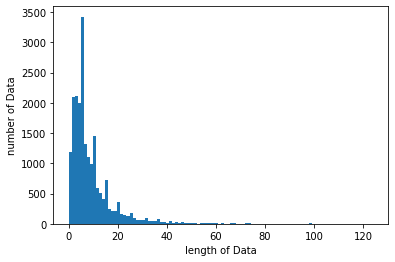

In [20]:
print('train 리뷰의 최대 길이 :',max(len(l) for l in X_token))
print('리뷰의 평균 길이 :',sum(map(len, X_token))/len(X_token))
plt.hist([len(s) for s in X_token], bins=100)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [21]:
max_len = 124
X_data = pad_sequences(X_token, maxlen=max_len)
print("data shape: ", X_data.shape)

data shape:  (20555, 124)


In [22]:
y_data = np.array(y_data).reshape(-1, 1)

In [23]:
print(type(X_data))
print(type(y_data))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [24]:
print(X_data[:3])
print(y_data[:3])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0   58  939  749 1575   71  116    2  338 6318]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
 

# 데이터 분리

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size= 0.3, random_state=1234)

In [26]:
print(X_train[:3])
print(y_train[:3]) 

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0  208   39 1696    5   17]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
 

# LSTM -> RNN 변경(loss: 0.2741 - acc: 0.9298)

In [27]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

In [32]:
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(Embedding(vocab_size, 32)) # 임베딩 벡터의 차원은 32
model.add(SimpleRNN(32)) # RNN 셀의 hidden_size는 32
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Train on 11510 samples, validate on 2878 samples
Epoch 1/10
11510/11510 [==============================] - 13s 1ms/sample - loss: 0.4484 - acc: 0.8041 - val_loss: 0.2452 - val_acc: 0.9128
Epoch 2/10
11510/11510 [==============================] - 10s 862us/sample - loss: 0.1754 - acc: 0.9353 - val_loss: 0.1719 - val_acc: 0.9315
Epoch 3/10
11510/11510 [==============================] - 10s 869us/sample - loss: 0.1238 - acc: 0.9549 - val_loss: 0.1666 - val_acc: 0.9340
Epoch 4/10
11510/11510 [==============================] - 10s 887us/sample - loss: 0.1045 - acc: 0.9630 - val_loss: 0.1667 - val_acc: 0.9385
Epoch 5/10
11510/11510 [==============================] - 11s 968us/sample - loss: 0.0846 - acc: 0.9703 - val_loss: 0.1734 - val_acc: 0.9378
Epoch 6/10
11510/11510 [==============================] - 12s 1ms/sample - loss: 0.0702 - acc: 0.9759 - val_loss: 0.2495 - val_acc: 0.9044
Epoch 7/10
11510/11510 [==============================] - 12s 1ms/sample - loss: 0.0583 - acc: 0.9805 - val_l

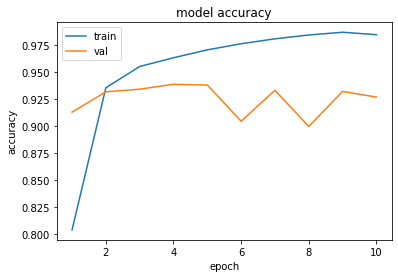

In [33]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

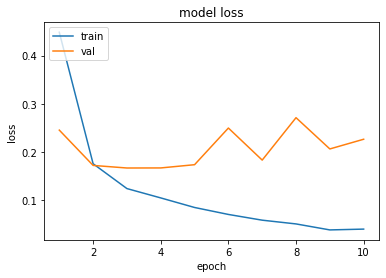

In [34]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [35]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32)

6167/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [36]:
model.save('C:\\Users\\user\\Documents\\GitHub\\grad_project\\model\\model4.h5')